## Business problem I am trying to solve

This app predicts how much of a loan will be granted to an applicant. The app uses different information about the profile and predict how much will be approved. Usually the applicant with a higher credit score, a co-applicant will be granted a larger loan amount. It depends also on how much the applicant has requested. 

# Importing necessary libraries

In [1]:
import os
os.getcwd()

'C:\\Users\\hassa\\Documents\\loan-amount-prediction'

In [2]:
!pip install pydantic==2.0.3

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sklearn

In [4]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable
  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pydantic<2,>=1.8.1 from https://files.pythonhosted.org/packages/0e/88/8e503b95402c73e023d705293ff0659f133976cdd726f7f8dffce5e8eef4/pydantic-1.10.12-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/150.6 kB ? eta -:--:--
     -------------------------------------- 150.6/150.6 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.1 MB 6.4 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/2.1 MB 5.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 4.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.1 MB 4.8 MB/s eta 0:00:01
   -------------------- ------------------- 1.1/2.1 MB 4.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 4.8 MB/s eta 0:00:01
   -------------------


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from pydantic import BaseModel, ValidationError, field_validator

In [ ]:
import missingno
print("Missingno Version: {}".format(missingno.__version__))

In [8]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
# from pandas_profiling import ProfileReport
from pathlib import Path
from scipy import stats
from yellowbrick.model_selection import FeatureImportances 
import shap
import joblib
%matplotlib inline


In [ ]:
!pip install yellowbrick


In [ ]:
import yellowbrick
print(yellowbrick.__version__)

In [ ]:
!pip install shap

In [ ]:
import shap
print("Shap Version: {}".format(shap.__version__))

# 1. Getting the data

## 1.1 Importing CSV Files

In [9]:
train_original = pd.read_csv('datasets/train.csv')
test_original = pd.read_csv('datasets/test.csv')

## 1.2 Splitting data into training and test sets

In [10]:
train_original.shape

(30000, 24)

In [11]:
test_original.shape

(20000, 23)

In [12]:
train_original.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [13]:
test_original.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [14]:
train_original.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [15]:
test_original.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

In [16]:
pd.set_option('display.max_columns', None)
train_original.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   Current Loan Expenses (USD) Expense Type 1 Expense Type 2  Dependents  \
0                       241.08              N              N         3.0   
1                       495.81              N              Y         1.0   
2                       171.95              N              Y         1.0   
3                       298.54              N              Y         2.0   
4                       491.41              N              Y         NaN   

   Credit Score  No. of Defaults Has Active Credit Card  Property ID  \
0        809.44                0                    NaN          746   
1        780.40                0            Unpossessed          608   
2        833.15                0            Unpossessed          546   
3        832.70                1            Unpossessed          890   
4        745.55                1                 Active          715   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural             1   
1       4952.91              2             Rural             1   
2        988.19              2             Urban             0   
3           NaN              2        Semi-Urban             1   
4       2614.77              4        Semi-Urban             1   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28

In [17]:
test_original.head()

Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-26247  Tandra Olszewski      F   47       3472.69              Low   
1     C-35067     Jeannette Cha      F   57       1184.84              Low   
2     C-34590      Keva Godfrey      F   52       1266.27              Low   
3     C-16668      Elva Sackett      M   65       1369.72             High   
4     C-12196    Sade Constable      F   60       1939.23             High   

             Profession Type of Employment    Location  \
0  Commercial associate           Managers  Semi-Urban   
1               Working        Sales staff       Rural   
2               Working                NaN  Semi-Urban   
3             Pensioner                NaN       Rural   
4             Pensioner                NaN       Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                  137088.98                       396.72              N   
1                  104771.59                       463.76              Y   
2                  176684.91                       493.15              N   
3                   97009.18                       446.15              N   
4                  109980.00                       370.10              N   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N         2.0        799.14                0   
1              Y         2.0        833.31                0   
2              Y         3.0        627.44                0   
3              Y         2.0        833.20                0   
4              N         NaN           NaN                0   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0            Unpossessed          843       3472.69              2   
1            Unpossessed           22       1184.84              1   
2            Unpossessed            1       1266.27              1   
3               Inactive          730       1369.72              1   
4                    NaN          356       1939.23              4   

  Property Location Co-Applicant Property Price  
0             Urban            1       236644.5  
1             Rural            1       142357.3  
2             Urban            1      300991.24  
3        Semi-Urban            0       125612.1  
4        Semi-Urban            1       180908.0

Since the test dataset does not have target variable (loan Sanction Amount, we will split the train dataset into a new train and test dataset. 

In [18]:
full_data = train_original

In [19]:
full_data.shape

(30000, 24)

In [20]:
#splitting the data into train and test sets
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size = test_size, random_state = 42)
    return train_df.reset_index(drop = True), test_df.reset_index(drop = True)

In [21]:
loan_amt_train_original, loan_amt_test_original = data_split(full_data, 0.2)

In [22]:
loan_amt_train_copy, loan_amt_test_copy = loan_amt_train_original.copy(), loan_amt_test_original.copy()

In [23]:
loan_amt_train_copy.shape

(24000, 24)

In [24]:
loan_amt_test_copy.shape

(6000, 24)

# 2. Explore the data

## 2.1 Quick Glance At The Data

In [25]:
loan_amt_train_copy.head()

Customer ID            Name Gender  Age  Income (USD) Income Stability  \
0     C-15808  Minerva Dundon      M   27      12398.65              Low   
1     C-29367  Darius Granado      M   36           NaN              Low   
2     C-20386   Verlene Hagar      M   52           NaN              Low   
3     C-14237    Yang Leitner      F   18           NaN              Low   
4     C-14759   Ilda Jeffords      F   18       2203.52              Low   

             Profession Type of Employment    Location  \
0               Working           Managers       Urban   
1               Working                NaN  Semi-Urban   
2  Commercial associate        Sales staff  Semi-Urban   
3               Working           Laborers       Rural   
4               Working           Laborers  Semi-Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                  294604.89                      1255.89              Y   
1                  132263.08                       500.43              N   
2                  112307.54                       539.09              N   
3                   24268.35                       168.21              N   
4                   76342.04                       681.95              N   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N         2.0           NaN                0   
1              N         1.0        646.05                1   
2              Y         1.0        706.42                0   
3              N         2.0        640.23                0   
4              Y         2.0        835.55                0   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0                 Active          540      12398.65              4   
1                    NaN          320           NaN              3   
2                 Active            6           NaN              2   
3            Unpossessed          869           NaN              2   
4               Inactive           21       2203.52              3   

  Property Location  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0        Semi-Urban             1       526542.91                   235683.91  
1             Urban             1       250293.24                        0.00  
2             Rural             1       157866.23                    72999.90  
3             Urban             1        30470.51                        0.00  
4             Urban             1       142224.12                    57256.53

In [26]:
loan_amt_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  24000 non-null  object 
 1   Name                         24000 non-null  object 
 2   Gender                       23954 non-null  object 
 3   Age                          24000 non-null  int64  
 4   Income (USD)                 20352 non-null  float64
 5   Income Stability             22676 non-null  object 
 6   Profession                   24000 non-null  object 
 7   Type of Employment           18228 non-null  object 
 8   Location                     24000 non-null  object 
 9   Loan Amount Request (USD)    24000 non-null  float64
 10  Current Loan Expenses (USD)  23872 non-null  float64
 11  Expense Type 1               24000 non-null  object 
 12  Expense Type 2               24000 non-null  object 
 13  Dependents      

In [27]:
loan_amt_train_copy.describe()

Age   Income (USD)  Loan Amount Request (USD)  \
count  24000.000000   20352.000000               24000.000000   
mean      40.058417    2567.533530               89075.615086   
std       16.029209    1775.075442               59637.687461   
min       18.000000     378.760000                6048.240000   
25%       25.000000    1652.707500               41272.637500   
50%       40.000000    2229.965000               75326.655000   
75%       55.000000    3092.775000              120378.247500   
max       65.000000  122966.280000              621497.820000   

       Current Loan Expenses (USD)    Dependents  Credit Score  \
count                 23872.000000  21983.000000  22623.000000   
mean                    401.409325      2.250512    739.726632   
std                     241.893479      0.947379     72.271823   
min                    -999.000000      1.000000    580.000000   
25%                     248.932500      2.000000    681.225000   
50%                     375.275000      2.000000    739.880000   
75%                     521.215000      3.000000    799.090000   
max                    3419.660000     10.000000    896.260000   

       No. of Defaults   Property ID   Property Age  Property Type  \
count     24000.000000  24000.000000   20149.000000   24000.000000   
mean          0.193875    502.302000    2567.841029       2.463708   
std           0.395340    288.707474    1776.812939       1.121005   
min           0.000000      1.000000     378.760000       1.000000   
25%           0.000000    251.000000    1653.040000       1.000000   
50%           0.000000    503.000000    2231.100000       2.000000   
75%           0.000000    753.000000    3094.050000       3.000000   
max           1.000000    999.000000  122966.280000       4.000000   

       Co-Applicant  Property Price  Loan Sanction Amount (USD)  
count  24000.000000    2.400000e+04                23725.000000  
mean      -4.686333    1.320183e+05                47680.600489  
std       74.227397    9.356624e+04                48224.124688  
min     -999.000000   -9.990000e+02                 -999.000000  
25%        1.000000    6.079394e+04                    0.000000  
50%        1.000000    1.101687e+05                35273.020000  
75%        1.000000    1.790840e+05                74217.940000  
max        1.000000    1.077967e+06               395368.740000

In [28]:
loan_amt_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  6000 non-null   object 
 1   Name                         6000 non-null   object 
 2   Gender                       5993 non-null   object 
 3   Age                          6000 non-null   int64  
 4   Income (USD)                 5072 non-null   float64
 5   Income Stability             5641 non-null   object 
 6   Profession                   6000 non-null   object 
 7   Type of Employment           4502 non-null   object 
 8   Location                     6000 non-null   object 
 9   Loan Amount Request (USD)    6000 non-null   float64
 10  Current Loan Expenses (USD)  5956 non-null   float64
 11  Expense Type 1               6000 non-null   object 
 12  Expense Type 2               6000 non-null   object 
 13  Dependents        

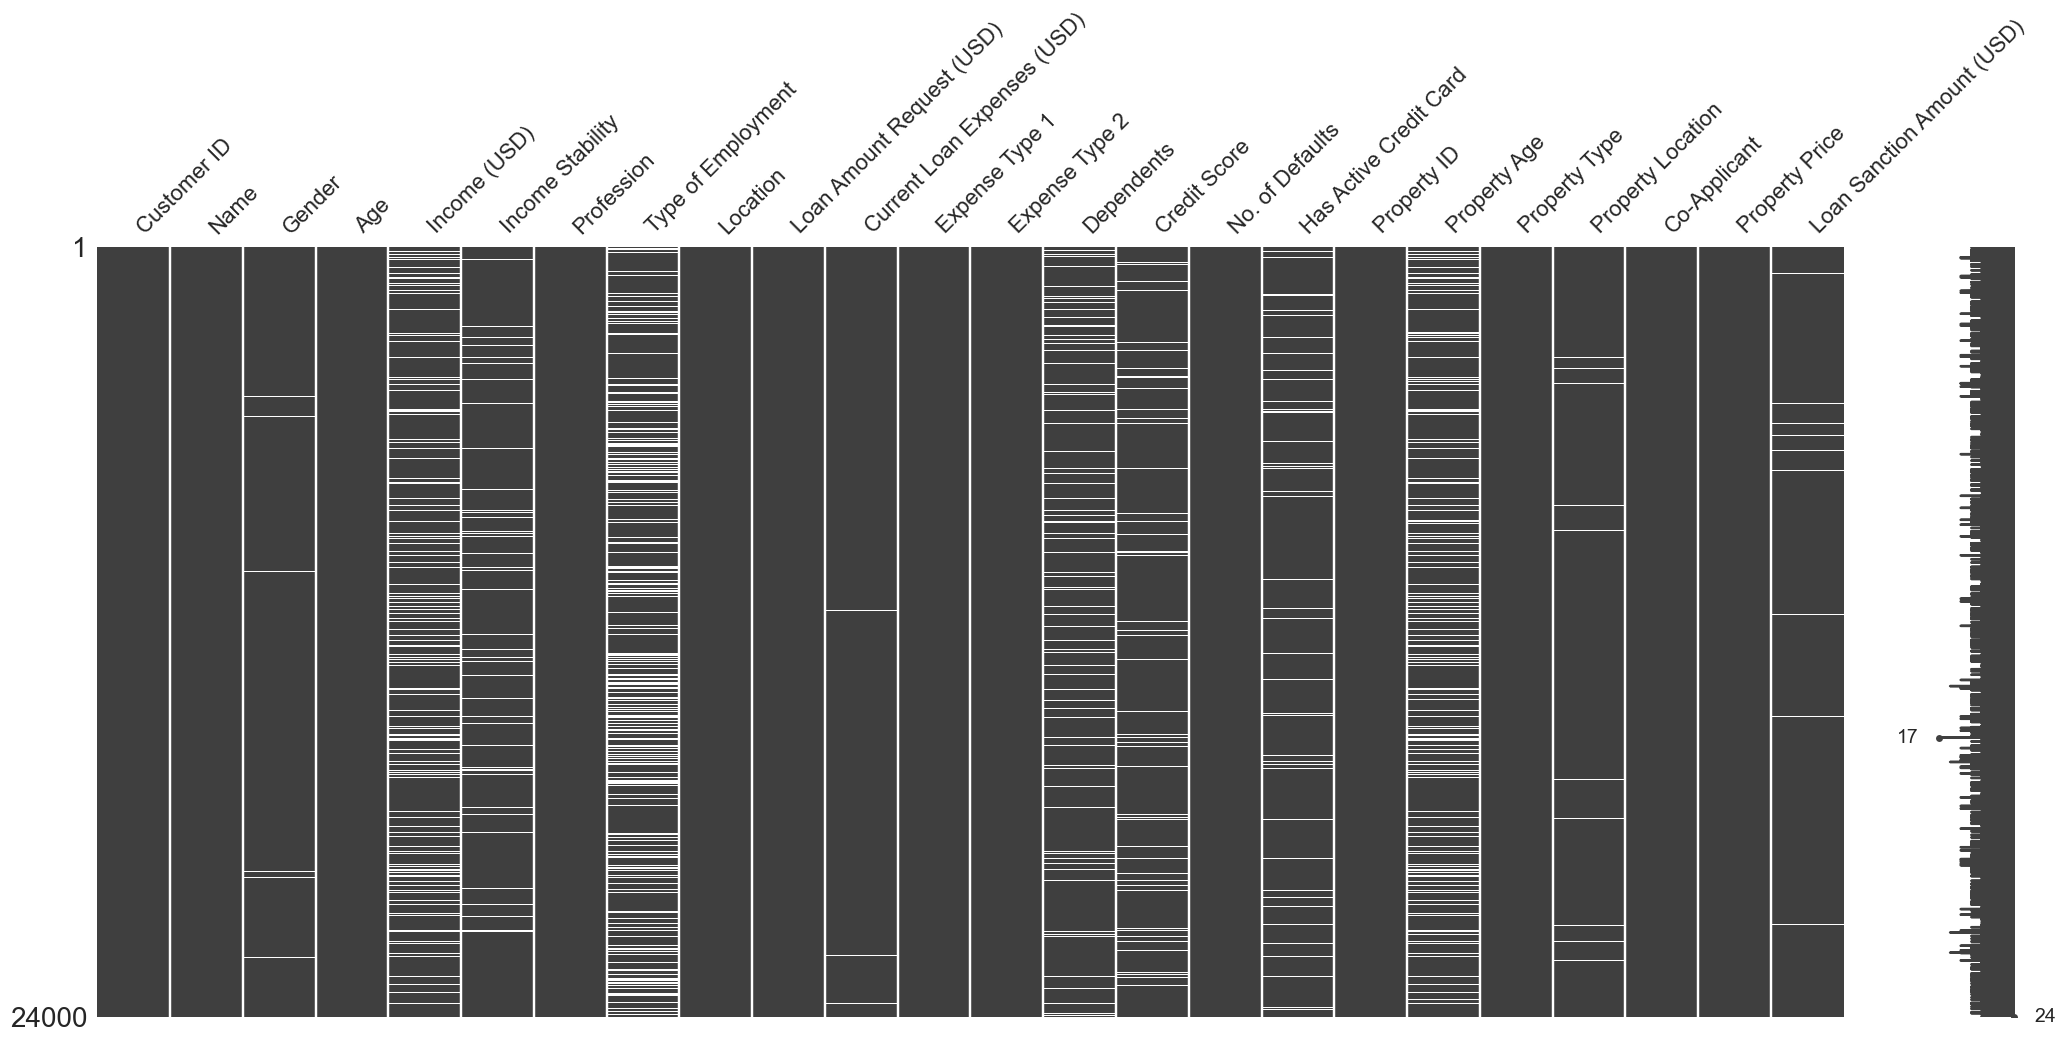

In [29]:
msno.matrix(loan_amt_train_copy)
plt.show()

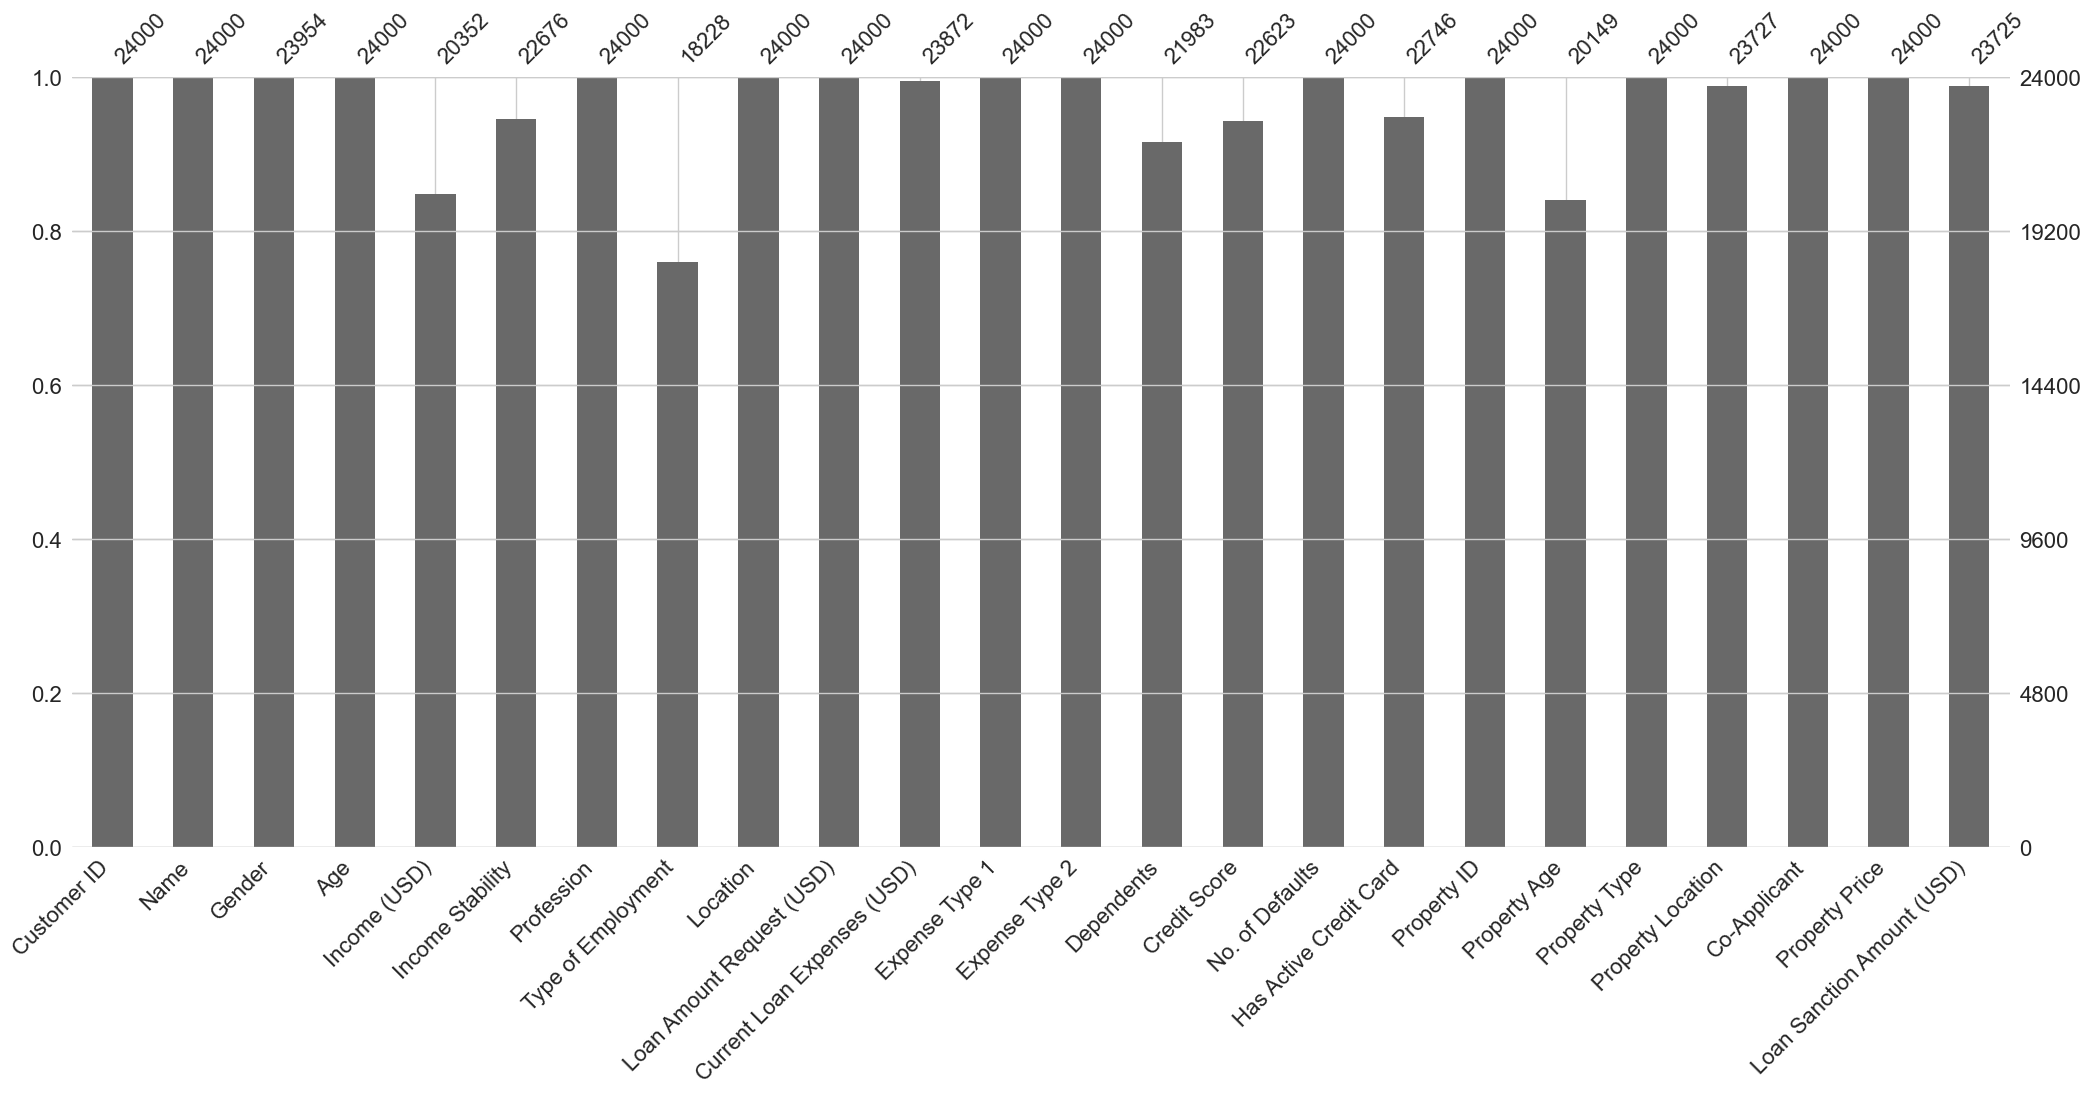

In [30]:
msno.bar(loan_amt_train_copy)
plt.show()

## 2.2 Functions Used In The EDA Of Each Feature

In [31]:
def value_cnt_norm_cal(df,feature):
    '''
    Function that will return the value count and frequency of each observation within a feature
    '''
    ftr_value_cnt = df[feature].value_counts()
    # normalize the value count
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [32]:
def gen_info_feat(df,feature):
    '''
    function to create display general information about the feature
    '''
    match feature:
        case 'Age' | 'Income (USD)' | 'Loan Amount Request (USD)' | 'Current Loan Expenses (USD)' | 'Credit Score' | 'Property Price' | 'Loan Sanction Amount (USD)':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case 'Property Age':
            print('Description:\n{}'.format(df[feature].describe()/365.25))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_cnt_norm_cal(df,feature)
            print('Value count:\n{}'.format(value_cnt))

In [33]:
def create_bar_plot(df, feature):
    '''
    function to create a bar chart plot
    '''
    match feature:
        case 'Profession' | 'Type of Employment' | 'Dependents':
            fig, ax = plt.subplots(figsize = (8,10))
            sns.barplot(x = value_cnt_norm_cal(df, feature).index, y = value_cnt_norm_cal(df, feature).values[:,0], color = 'dimgray')
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.xticks(rotation = 45, ha = 'right')
            plt.title('{} count'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize = (6,10))
            sns.barplot(x = value_cnt_norm_cal(df, feature).index, y = value_cnt_norm_cal(df, feature).values[:,0])
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.xticks(rotation = 45, ha = 'right')
            plt.title('{} count'.format(feature))
            return plt.show()
    

In [34]:
def create_donnut_pie_chart(df,feature):
    '''
    function to create a donnut pie chart
    '''
    ratio_size = value_cnt_norm_cal(df, feature)
    ratio_size_len = len(ratio_size.index)
    ratio_list = []
    for i in range(ratio_size_len):
        ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
    fig, ax = plt.subplots(figsize=(8,8))
    # %1.2f%% display decimals in the pie chart with 2 decimal places
    plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
    plt.title('Pie chart of {}'.format(feature))
    plt.legend(loc='best')
    plt.axis('equal')
    # add a circle at the center to transform it in a donut chart
    circle=plt.Circle( (0,0), 0.8, color='white')
    p=plt.gcf()
    p.gca().add_artist(circle)
    return plt.show()

In [35]:
def create_box_plot(df, feature):
    '''
    function to create a box plot
    '''
    match feature:
        case 'Property Age':
            fig, ax = plt.subplots(figsize = (2,8))
            sns.boxplot(y = df[feature]/365.25)
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize = (2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show

In [36]:
def create_hist_plot(df, feature, the_bins = 50):
    '''
    funciton to create a histogram plot'''
    match feature:
        case 'Property Age':
            fig, ax = plt.subplots(figsize = (18,10))
            sns.histplot(df[feature]/365.25, bins = the_bins, kde = True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize = (18,10))
            sns.histplot(df[feature], bins = the_bins, kde = True)
            plt.title('{} distribution '.format(feature))
            return plt.show()

In [37]:
def missing_val_norm(df, feature):
    feat_nan_count = df[feature].isnull().sum()
    rows_count = df.shape[0]
    return 'The percentage of missing rows is {:.2f}%'.format(feat_nan_count * 100 / rows_count)

## 2.3 Univariate Analysis

### 2.3.1 Gender

In [38]:
gen_info_feat(loan_amt_train_copy, 'Gender')

Description:
count     23954
unique        2
top           M
freq      12087
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
M  12087      50.459213
F  11867      49.540787


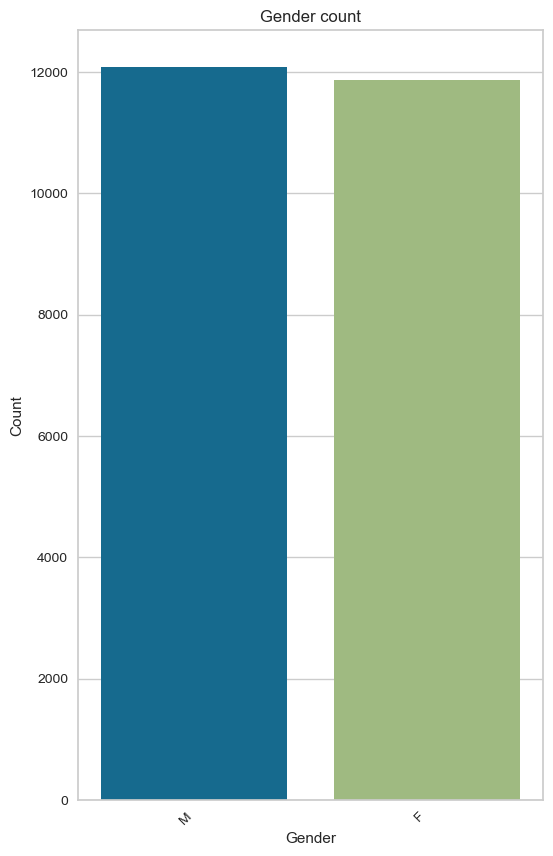

In [39]:
create_bar_plot(loan_amt_train_copy, 'Gender')

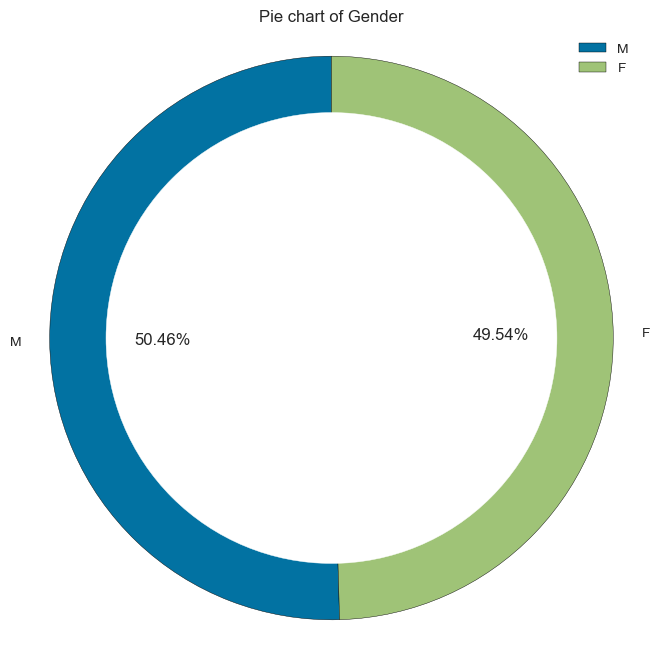

In [40]:
create_donnut_pie_chart(loan_amt_train_copy,'Gender')

Interpretation: 
* We have almost the same number of Male vs Female (50.46% vs 49.54%)

### 2.3.2 Age

In [41]:
gen_info_feat(loan_amt_train_copy, 'Age')

Description:
count    24000.000000
mean        40.058417
std         16.029209
min         18.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         65.000000
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.05019079901588933


<function matplotlib.pyplot.show(close=None, block=None)>

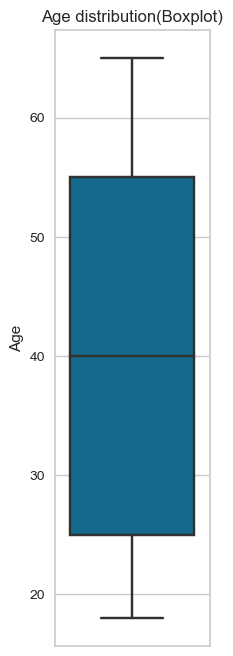

In [42]:
create_box_plot(loan_amt_train_copy, 'Age')

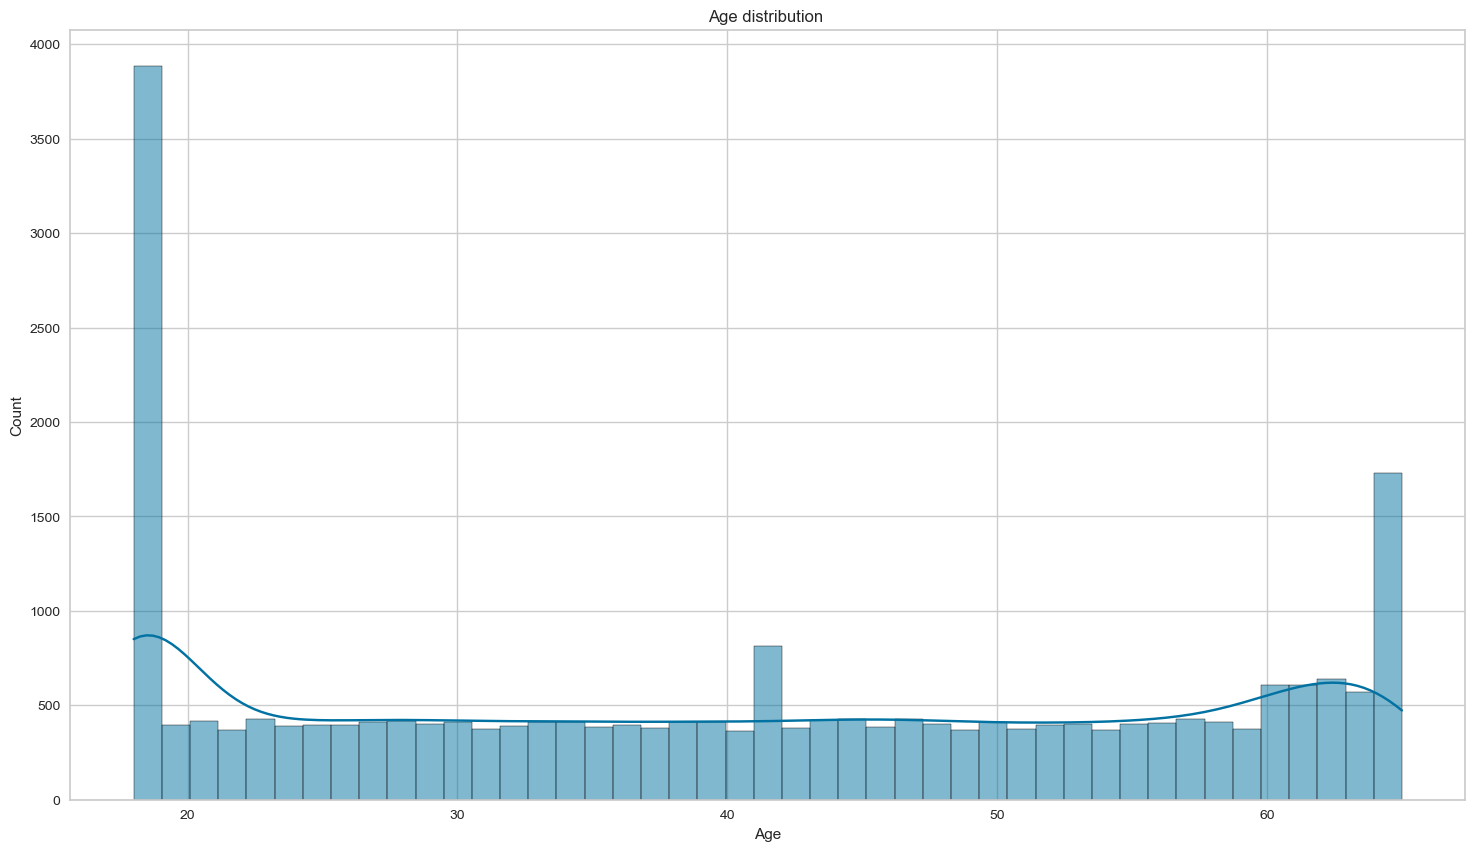

In [43]:
create_hist_plot(loan_amt_train_copy,'Age',the_bins = 45)

Interpretation: 
* Age is not normally distributed
* We have a large number of applicants who are 18 and 65 years old
* Mean and median of age is 40 years old

### 2.3.3 Income

In [44]:
gen_info_feat(loan_amt_train_copy, 'Income (USD)')

Description:
count     20352.000000
mean       2567.533530
std        1775.075442
min         378.760000
25%        1652.707500
50%        2229.965000
75%        3092.775000
max      122966.280000
Name: Income (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
19.759160741711046


<function matplotlib.pyplot.show(close=None, block=None)>

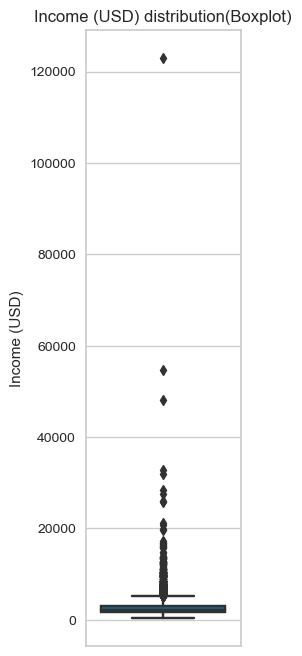

In [45]:
create_box_plot(loan_amt_train_copy, 'Income (USD)')

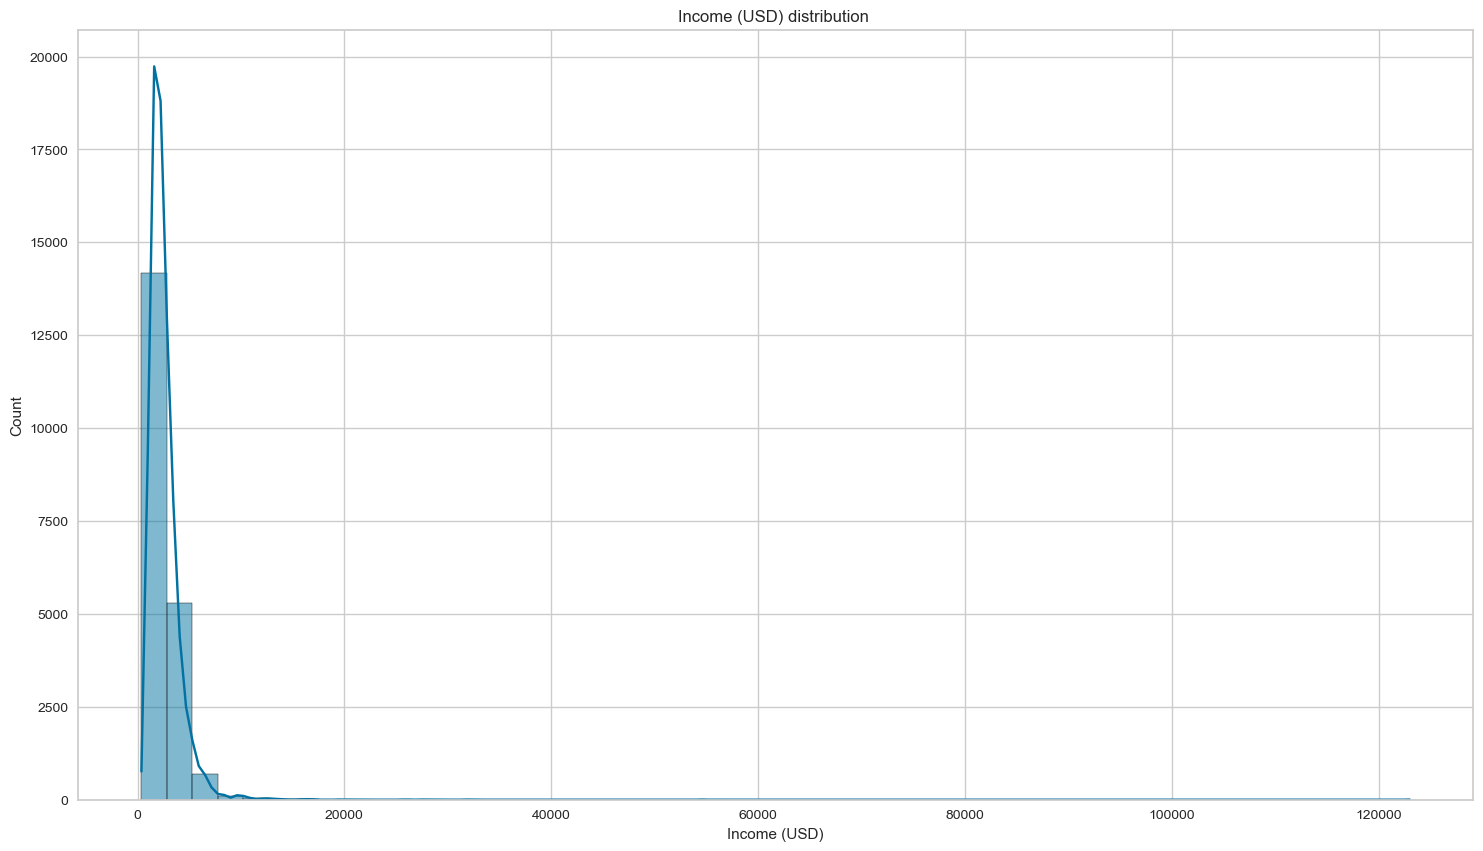

In [46]:
create_hist_plot(loan_amt_train_copy, 'Income (USD)', the_bins = 50)

In [47]:
missing_val_norm(loan_amt_train_copy,'Income (USD)')

'The percentage of missing rows is 15.20%'

Interpretation:
* The income feature has 15% of its data missing
* The income is positively skewed.
* The income has a lot of outliers
* The median income is $2229

### 2.3.4 Income Stability

In [48]:
gen_info_feat(loan_amt_train_copy, 'Income Stability')

Description:
count     22676
unique        2
top         Low
freq      20617
Name: Income Stability, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
      Count  Frequency (%)
Low   20617      90.919915
High   2059       9.080085


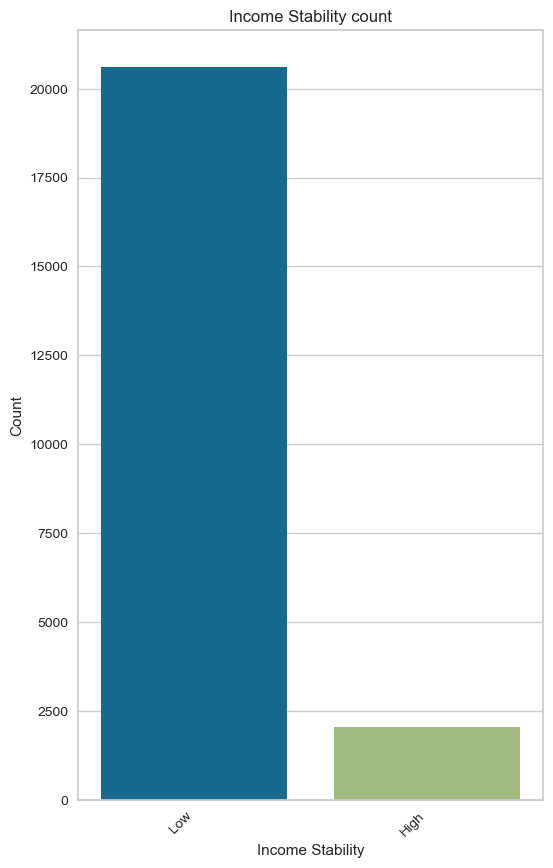

In [49]:
create_bar_plot(loan_amt_train_copy, 'Income Stability')

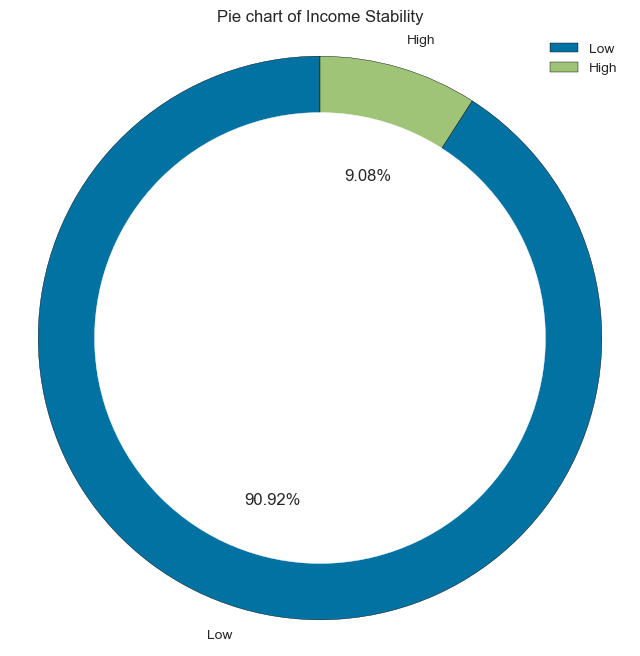

In [50]:
create_donnut_pie_chart(loan_amt_train_copy, 'Income Stability')

**Interpretation:**
* Less than 10% of applicatns have a high income stability 
* 90% of applicants have a low income stability

### Profession

In [51]:
gen_info_feat(loan_amt_train_copy, 'Profession')

Description:
count       24000
unique          7
top       Working
freq        13509
Name: Profession, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Working               13509      56.287500
Commercial associate   6433      26.804167
Pensioner              2193       9.137500
State servant          1861       7.754167
Unemployed                2       0.008333
Businessman               1       0.004167
Student                   1       0.004167


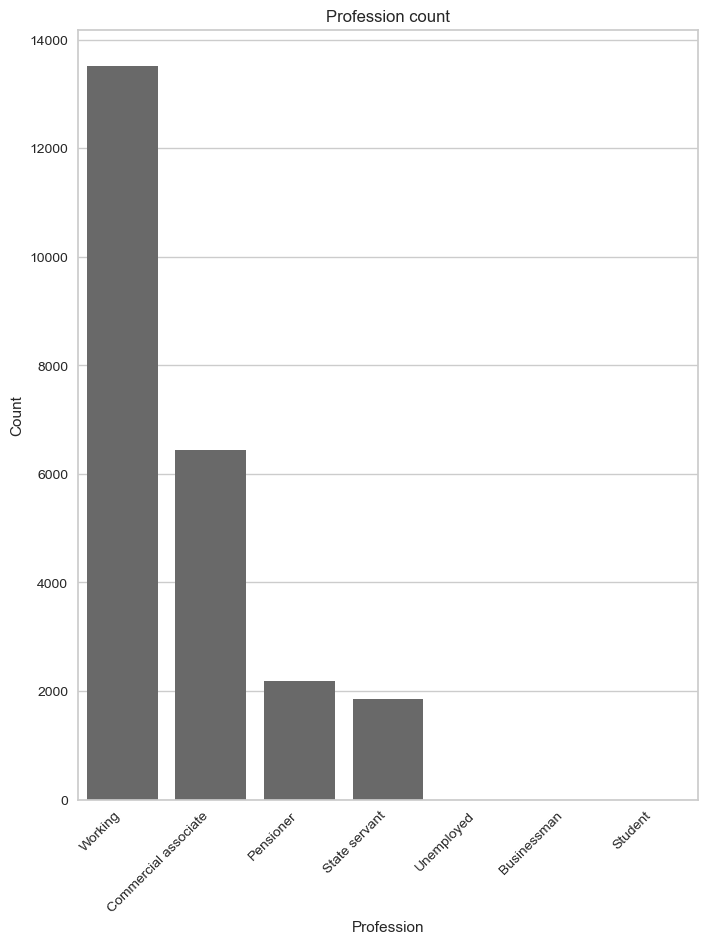

In [52]:
create_bar_plot(loan_amt_train_copy, 'Profession')

**Interpretation:**
* Most applicants are currently working, the second most represented category is commerical associate.
* We also have a number of applicants that have pensioned and state servant.
* The most unrepresented category are the unemployed, businessman and student. 

### 2..3.6 Type of employment

In [53]:
gen_info_feat(loan_amt_train_copy, 'Type of Employment')

Description:
count        18228
unique          18
top       Laborers
freq          4495
Name: Type of Employment, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Laborers                4495      24.659864
Sales staff             2997      16.441738
Core staff              2605      14.291200
Managers                1996      10.950187
Drivers                 1273       6.983761
Accountants             1096       6.012728
High skill tech staff   1044       5.727452
Medicine staff           669       3.670178
Security staff           477       2.616853
Cooking staff            446       2.446785
Cleaning staff           283       1.552557
Private service staff    280       1.536098
Secretaries              132       0.724161
Low-skill Laborers       125       0.685758
Waiters/barmen staff     122       0.669300
Realty agents             73    

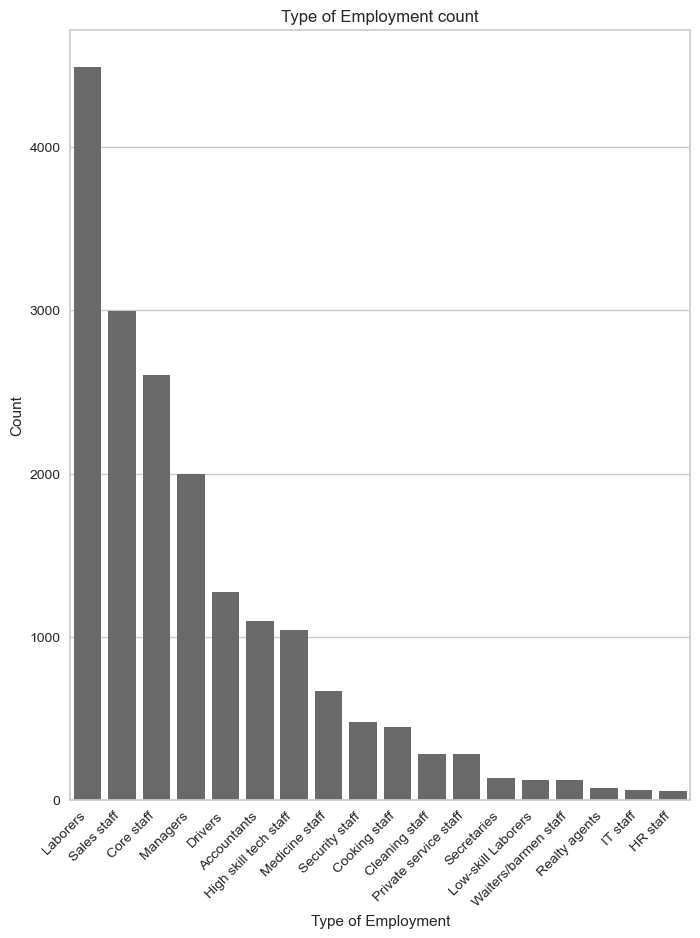

In [54]:
create_bar_plot(loan_amt_train_copy, 'Type of Employment')

**Interpretation:**
* The most represented employment are laborers, sales staff, core staff, and managers.
* The least represented employment are secretatires, low-skill laborers, watiers/barmen staff, realty agents, IT staff, HR Staff.

### 2.3.7 Location

In [55]:
gen_info_feat(loan_amt_train_copy, 'Location')

Description:
count          24000
unique             3
top       Semi-Urban
freq           17157
Name: Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  17157        71.4875
Rural        4320        18.0000
Urban        2523        10.5125


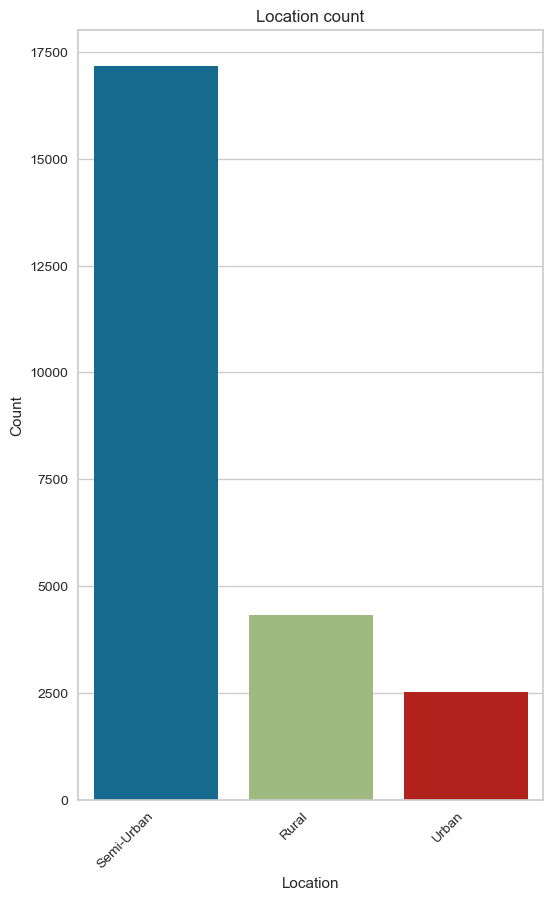

In [56]:
create_bar_plot(loan_amt_train_copy, 'Location')

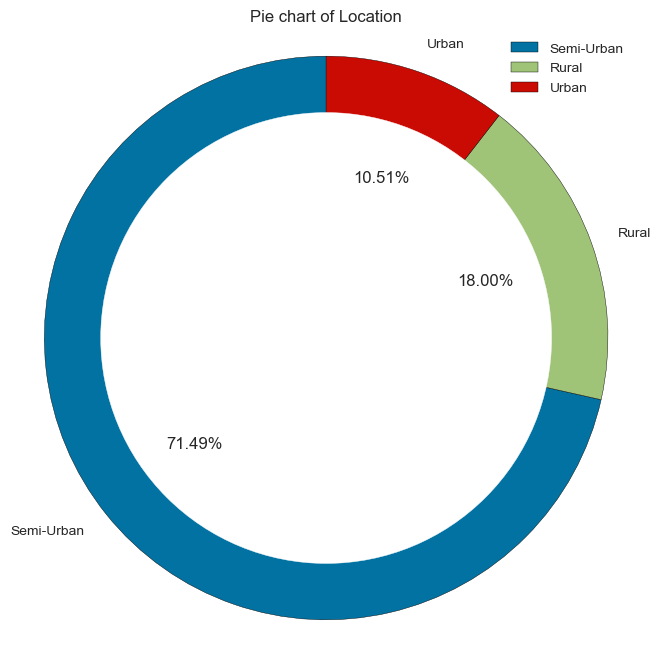

In [57]:
create_donnut_pie_chart(loan_amt_train_copy, 'Location')

**Interpreation:**
* 7 out of 10 applicants live in a semi-urban location. 
* Second most common location is the rural location. 
* Only 1 in 10 applicants live in an urban location

### 2.3.8 Loan Amount Request

In [58]:
gen_info_feat(loan_amt_train_copy, 'Loan Amount Request (USD)')

Description:
count     24000.000000
mean      89075.615086
std       59637.687461
min        6048.240000
25%       41272.637500
50%       75326.655000
75%      120378.247500
max      621497.820000
Name: Loan Amount Request (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2491353741072624


<function matplotlib.pyplot.show(close=None, block=None)>

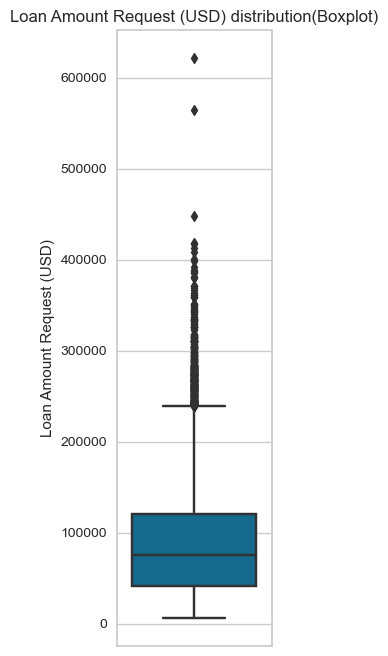

In [59]:
create_box_plot(loan_amt_train_copy, 'Loan Amount Request (USD)')

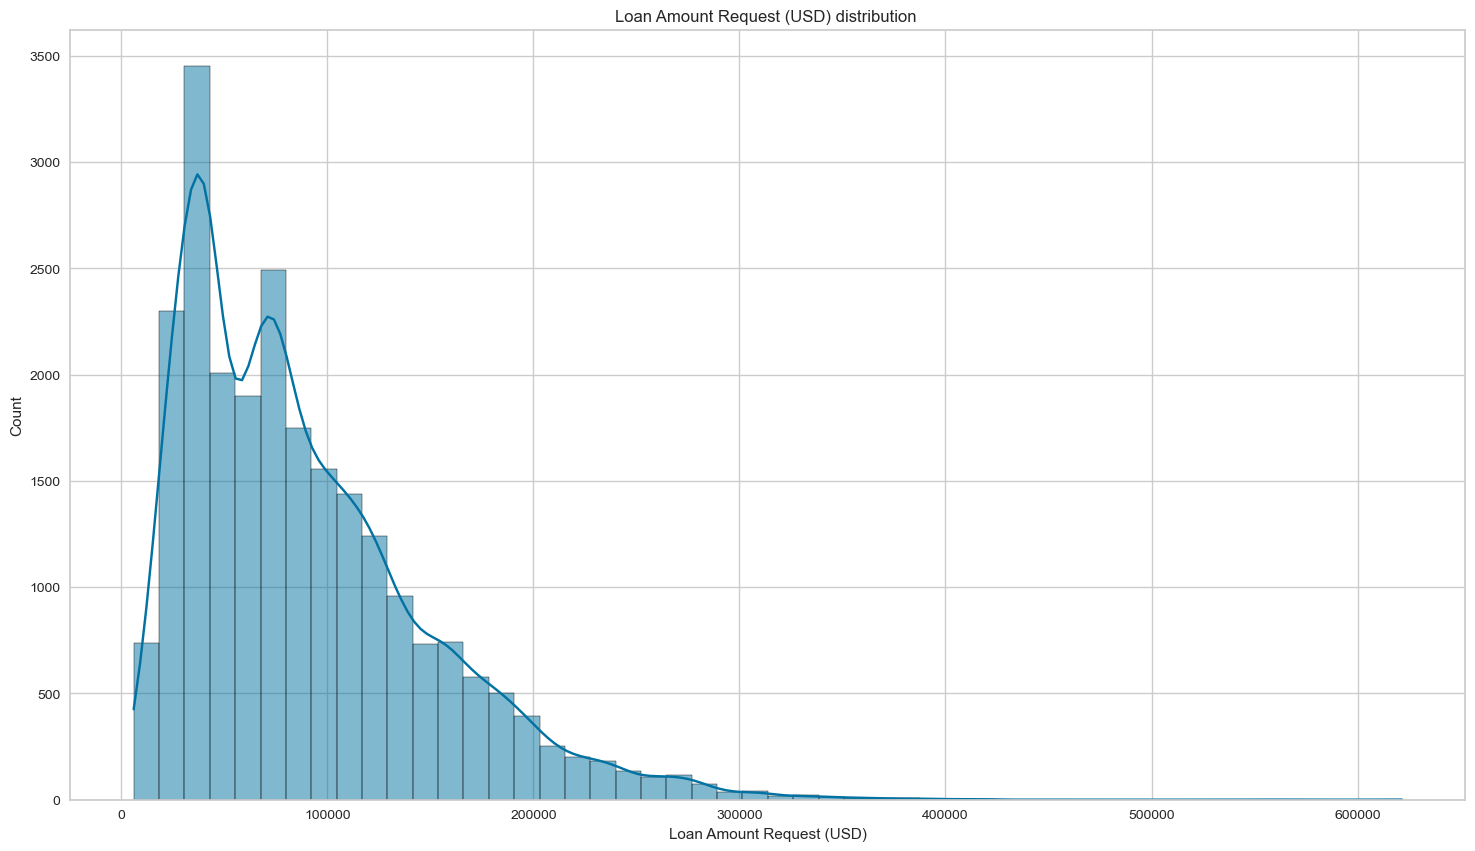

In [60]:
create_hist_plot(loan_amt_train_copy, 'Loan Amount Request (USD)')

**Interpretation:**
* The median of the loan amount request is $75326.655000.
* We have quite a number of outliers in the loan amount request. 
* The loan amount request distribution is positively skewed. 

### 2.3.9 Current Loan Expenses

In [61]:

gen_info_feat(loan_amt_train_copy, 'Current Loan Expenses (USD)')

Description:
count    23872.000000
mean       401.409325
std        241.893479
min       -999.000000
25%        248.932500
50%        375.275000
75%        521.215000
max       3419.660000
Name: Current Loan Expenses (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.032881699548371904


<function matplotlib.pyplot.show(close=None, block=None)>

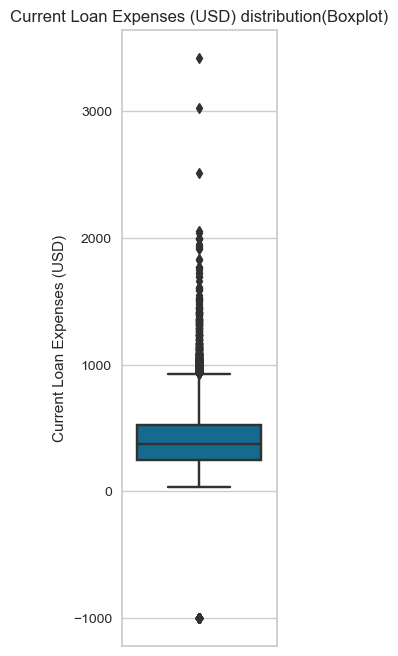

In [62]:
create_box_plot(loan_amt_train_copy, 'Current Loan Expenses (USD)')

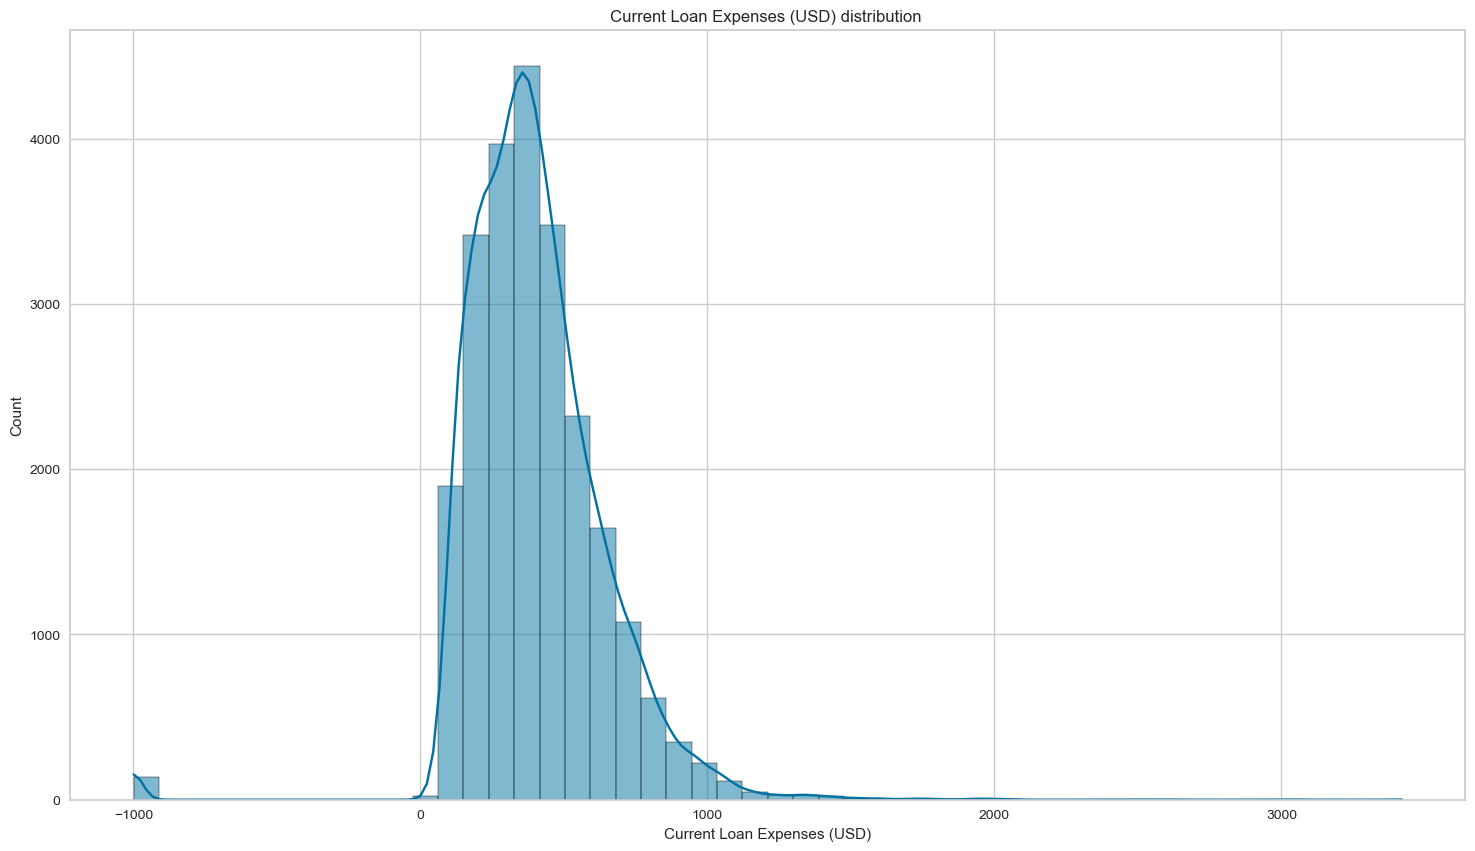

In [63]:
create_hist_plot(loan_amt_train_copy, 'Current Loan Expenses (USD)')

**Interpretation:**
* The mean current loan expenes is $401.409325.
* We also have some outliers.
* The current loane expenses is positively skewed. 

### 2.3.10 Expense Type 1

In [64]:
gen_info_feat(loan_amt_train_copy, 'Expense Type 1')

Description:
count     24000
unique        2
top           N
freq      15361
Name: Expense Type 1, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
N  15361      64.004167
Y   8639      35.995833


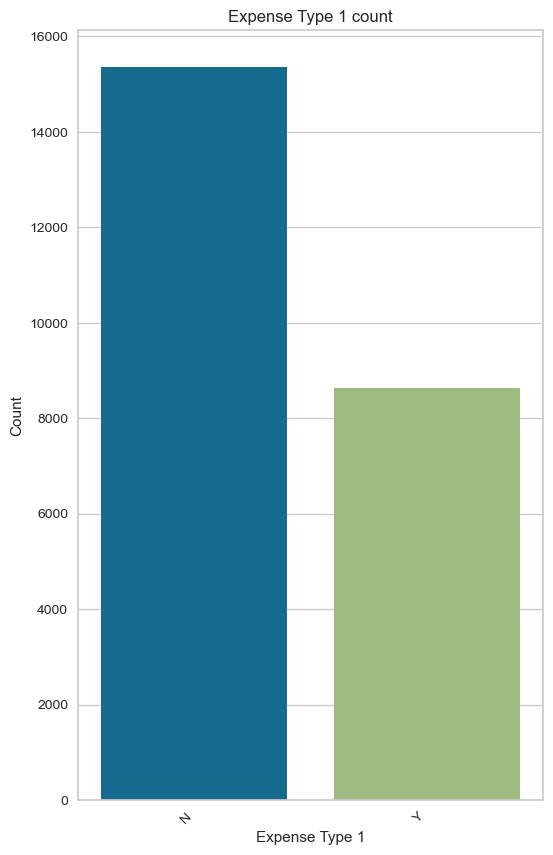

In [65]:
create_bar_plot(loan_amt_train_copy, 'Expense Type 1')

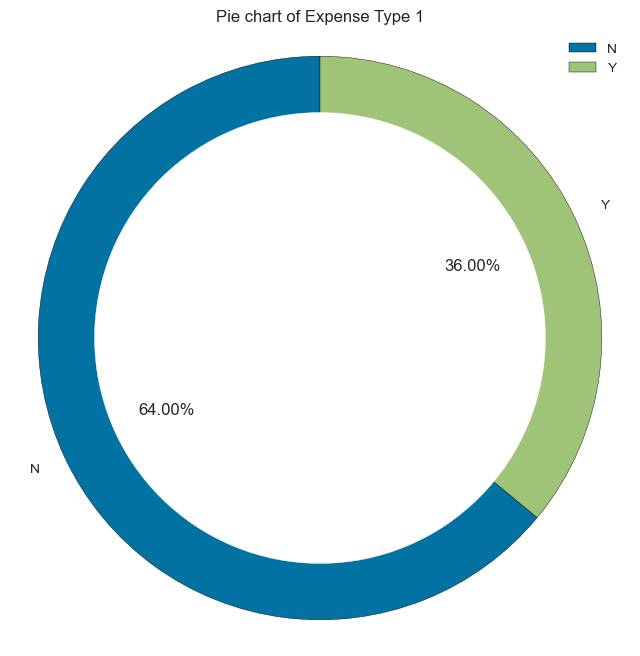

In [66]:
create_donnut_pie_chart(loan_amt_train_copy, 'Expense Type 1')

**Interpretation:**
* More than half of the applicants don't have the expenses type 1 on their loan

### 2.3.11 Expense Type 2

In [67]:
gen_info_feat(loan_amt_train_copy, 'Expense Type 2')

Description:
count     24000
unique        2
top           Y
freq      16116
Name: Expense Type 2, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
Y  16116          67.15
N   7884          32.85


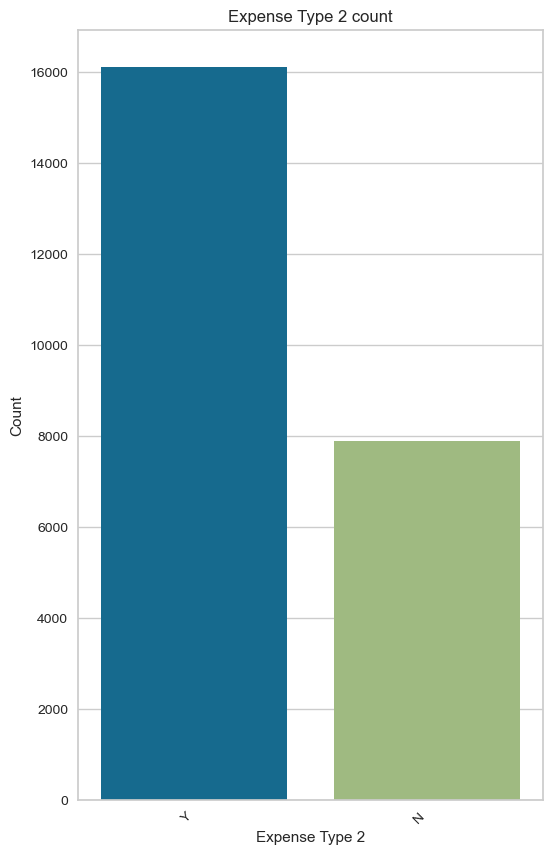

In [68]:
create_bar_plot(loan_amt_train_copy, 'Expense Type 2')

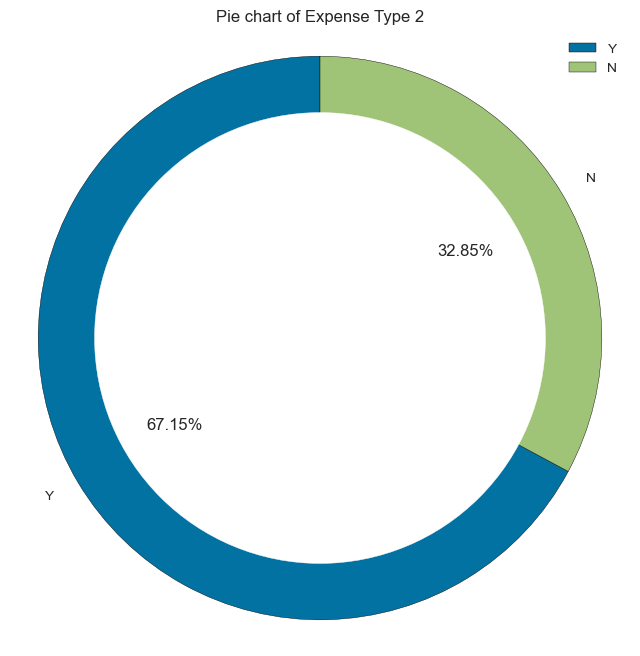

In [69]:
create_donnut_pie_chart(loan_amt_train_copy, 'Expense Type 2')

**Interpretation:**
* The majority of the applicants have expense type 2.

### 2.3.12 Dependents

In [70]:
gen_info_feat(loan_amt_train_copy, 'Dependents')

Description:
count    21983.000000
mean         2.250512
std          0.947379
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: Dependents, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
2.0   10471      47.632261
3.0    4568      20.779693
1.0    4447      20.229268
4.0    2160       9.825774
5.0     293       1.332848
6.0      37       0.168312
7.0       5       0.022745
8.0       1       0.004549
10.0      1       0.004549


<function matplotlib.pyplot.show(close=None, block=None)>

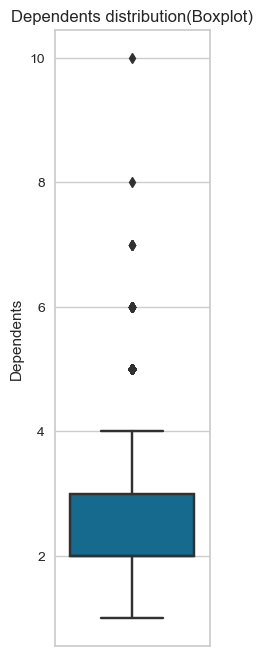

In [71]:
create_box_plot(loan_amt_train_copy,'Dependents')

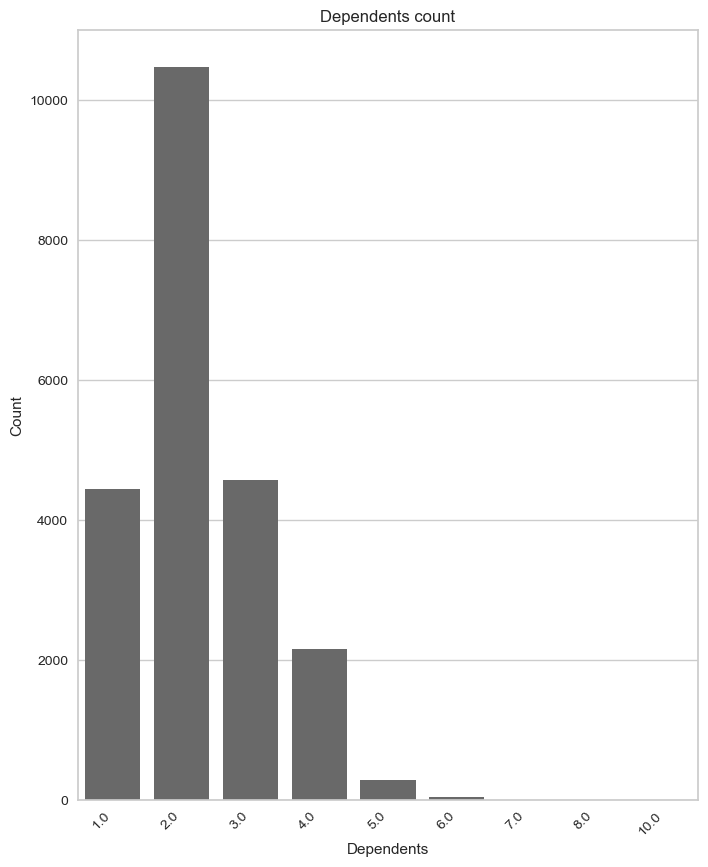

In [72]:
create_bar_plot(loan_amt_train_copy, 'Dependents')

**Interpretation:**
* Most applicants have 2 dependents.
* Then 1 and 3 dependents are the second most common. 
* Then 4 and 5 and so on. 

### 2.3.13 Credit Score

In [73]:
gen_info_feat(loan_amt_train_copy, 'Credit Score')

Description:
count    22623.000000
mean       739.726632
std         72.271823
min        580.000000
25%        681.225000
50%        739.880000
75%        799.090000
max        896.260000
Name: Credit Score, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.021671118190646724


<function matplotlib.pyplot.show(close=None, block=None)>

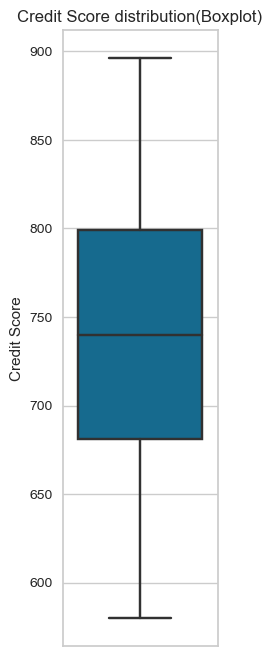

In [74]:
create_box_plot(loan_amt_train_copy,'Credit Score')

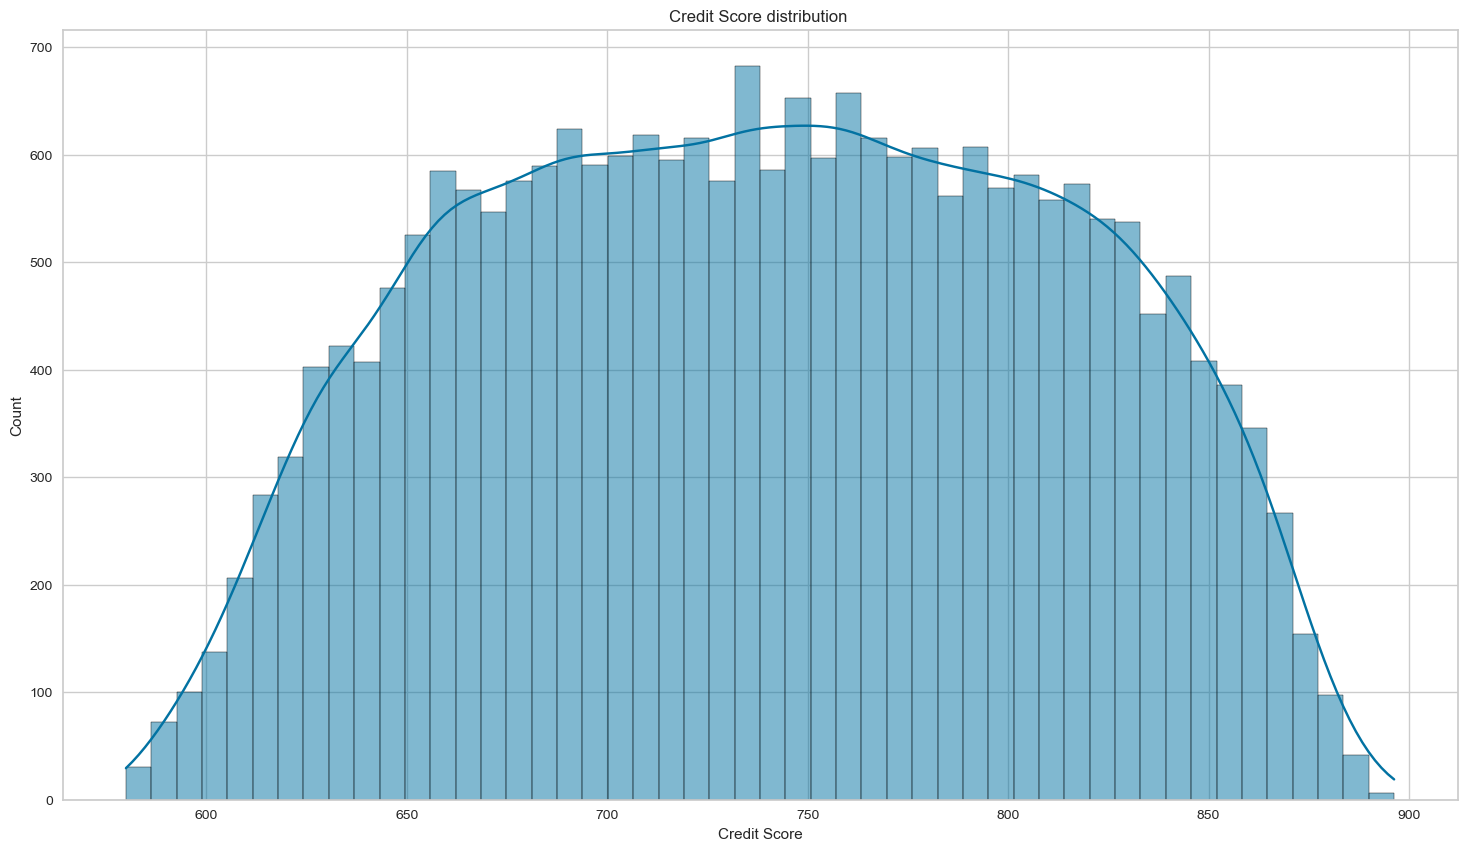

In [75]:
create_hist_plot(loan_amt_train_copy,'Credit Score')

**Interpretation:**
* The mean and median of applicant's credit score is 739.
* The credit score does not seems to be skewed but it is not normally distributed. 

### 2.3.14 Number of defaults

In [76]:
gen_info_feat(loan_amt_train_original,'No. of Defaults')

Description:
count    24000.000000
mean         0.193875
std          0.395340
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No. of Defaults, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0  19347        80.6125
1   4653        19.3875


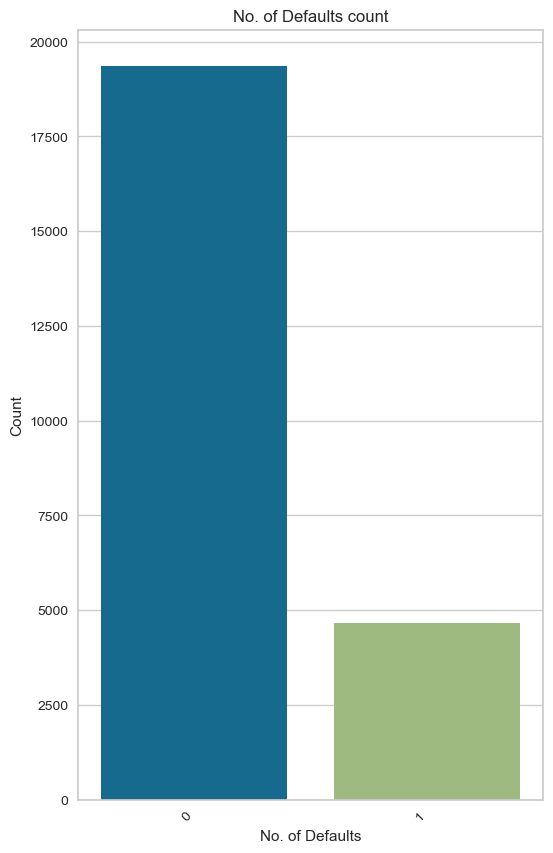

In [77]:
create_bar_plot(loan_amt_train_copy,'No. of Defaults')

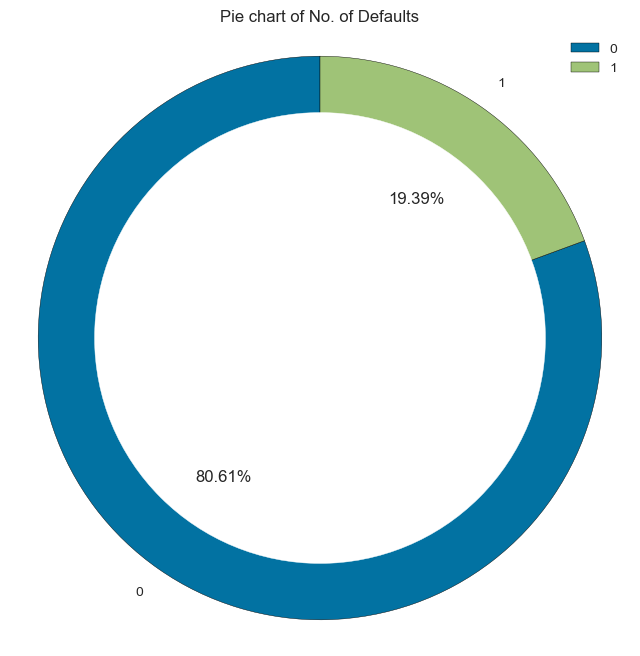

In [78]:
create_donnut_pie_chart(loan_amt_train_copy,'No. of Defaults')

**Interpretation:**
* 8 out of 10 people don't have any loan defaulted.

### 2.3.15 Has Active Credit Card

In [79]:
gen_info_feat(loan_amt_train_copy,'Has Active Credit Card')

Description:
count      22746
unique         3
top       Active
freq        7799
Name: Has Active Credit Card, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
             Count  Frequency (%)
Active        7799      34.287347
Inactive      7620      33.500396
Unpossessed   7327      32.212257


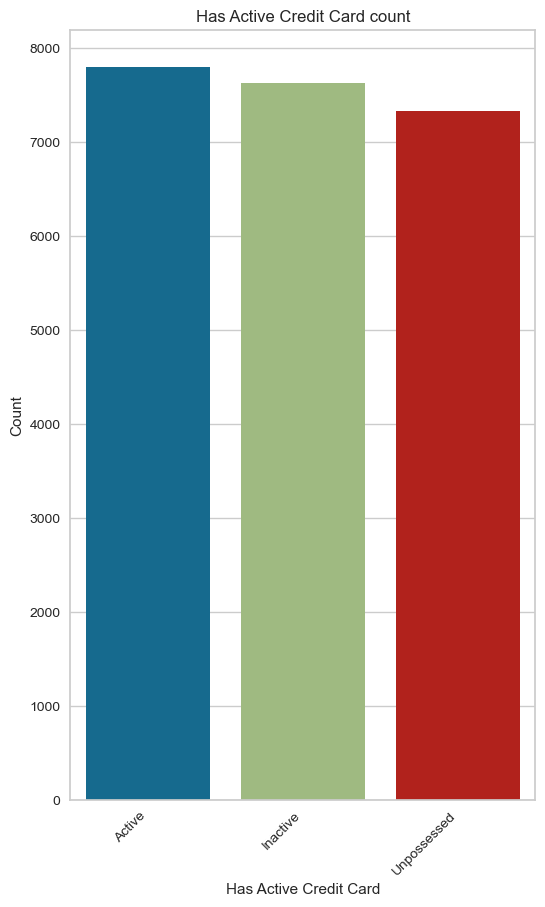

In [80]:
create_bar_plot(loan_amt_train_copy,'Has Active Credit Card')

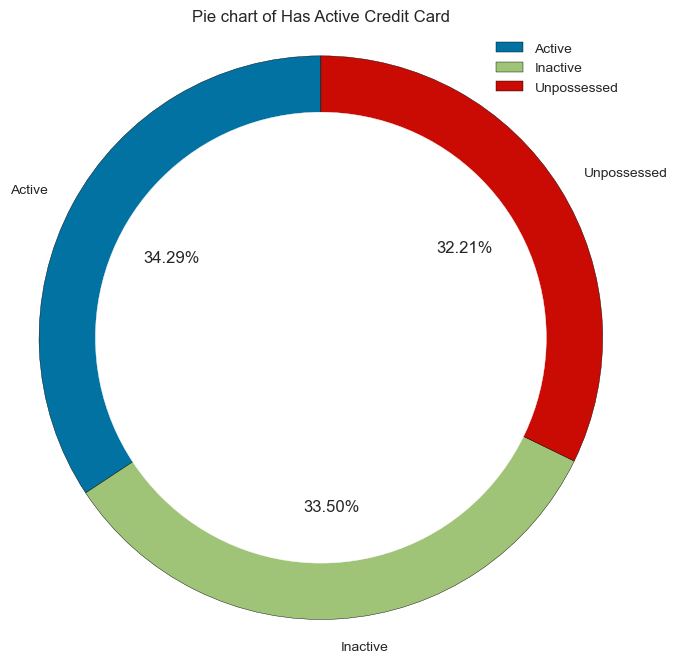

In [81]:
create_donnut_pie_chart(loan_amt_train_copy,'Has Active Credit Card')

**Interpretation:**
* We have almost an equal amount of people with an active, inactive and unpossessed credit card. 

### 2.3.16 Property Age

In [82]:
gen_info_feat(loan_amt_train_original,'Property Age')

Description:
count     55.164956
mean       7.030366
std        4.864649
min        1.036988
25%        4.525777
50%        6.108419
75%        8.471047
max      336.663326
Name: Property Age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
19.882898494886184


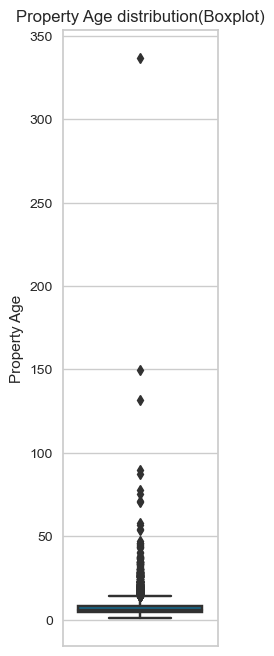

In [83]:
create_box_plot(loan_amt_train_original,'Property Age')

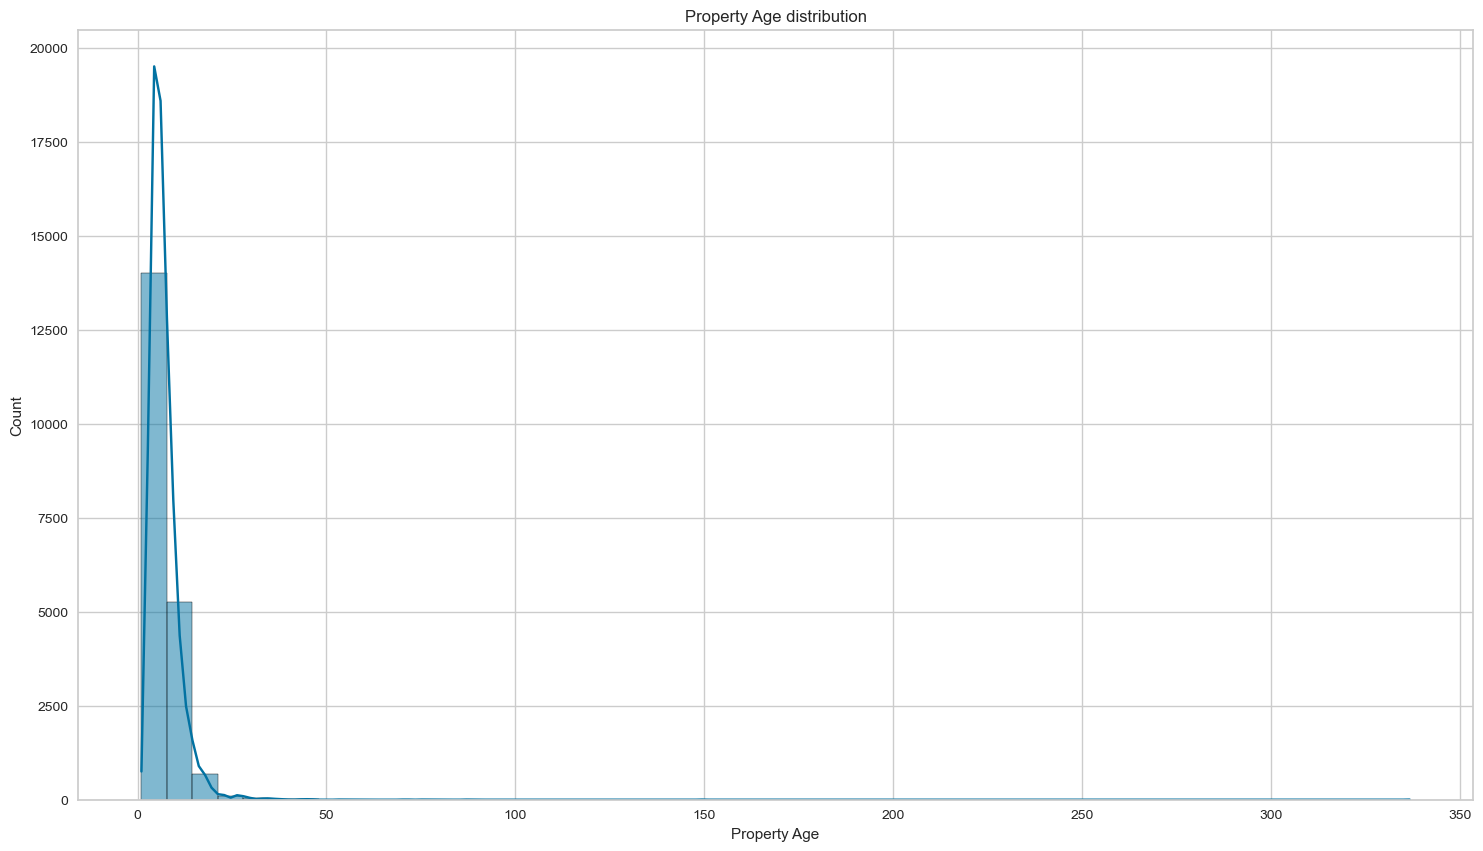

In [84]:
create_hist_plot(loan_amt_train_copy,'Property Age')

**Interpretation:**
* Assuming that the property age is expressed in days, most of the properties have a median age of 2231 days (6.1 years)
* The property age distribution is positively skewed. 

### 2.3.17 Property Type

In [85]:
gen_info_feat(loan_amt_train_copy,'Property Age')

Description:
count     55.164956
mean       7.030366
std        4.864649
min        1.036988
25%        4.525777
50%        6.108419
75%        8.471047
max      336.663326
Name: Property Age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
19.882898494886184


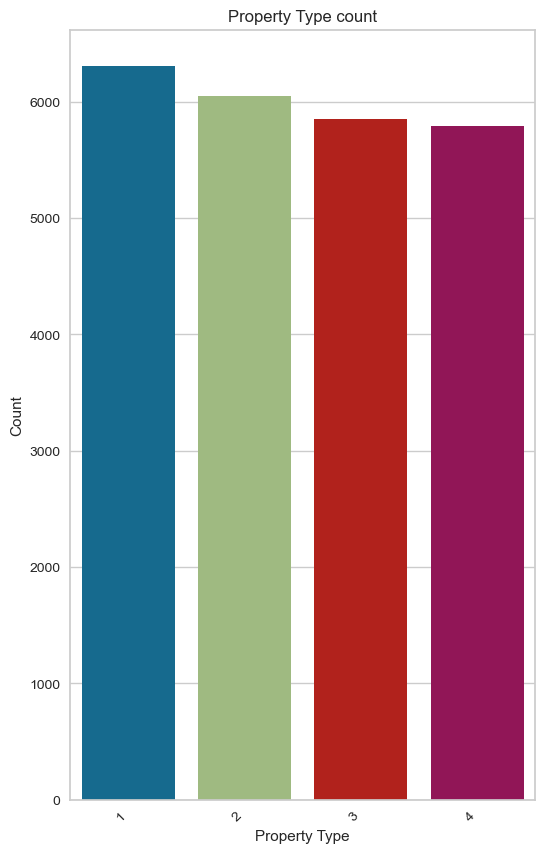

In [86]:
create_bar_plot(loan_amt_train_copy,'Property Type')

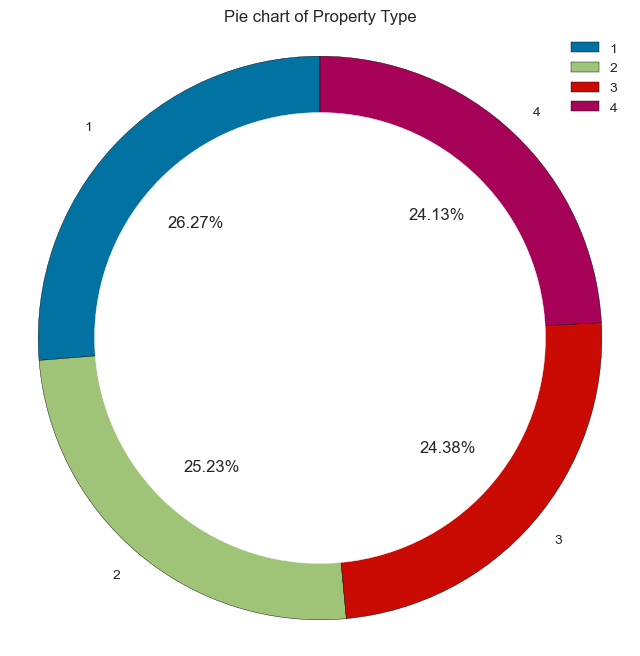

In [87]:
create_donnut_pie_chart(loan_amt_train_copy,'Property Type')

**Interpreation**:
* We have almost an equal amount of property types, each with 25%.

### 2.3.18 Property Location

In [88]:
gen_info_feat(loan_amt_train_copy,'Property Location')

Description:
count          23727
unique             3
top       Semi-Urban
freq            8277
Name: Property Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban   8277      34.884309
Rural        8060      33.969739
Urban        7390      31.145952


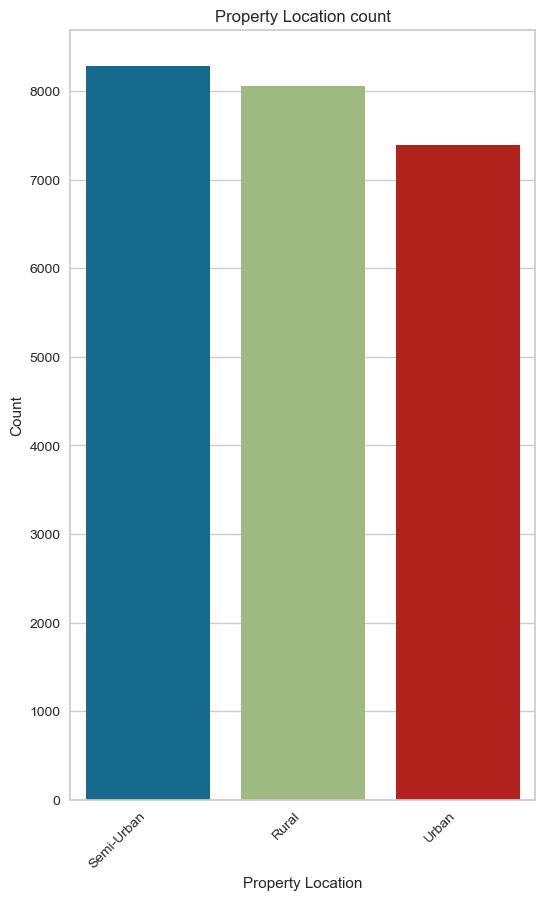

In [89]:
create_bar_plot(loan_amt_train_copy,'Property Location')

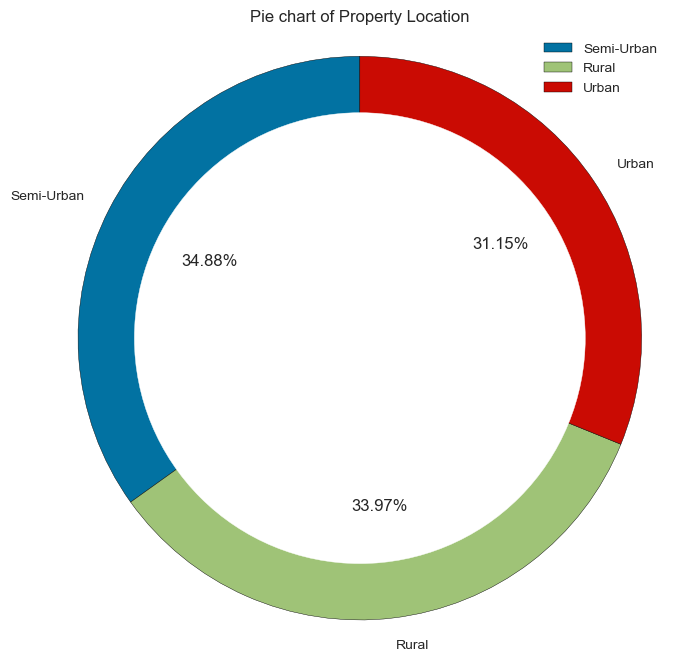

In [90]:
create_donnut_pie_chart(loan_amt_train_copy,'Property Location')

**Interpretation:**
* All the 3 property location are almost equally distributed at round 33%

### 2.3.19 Co-Applicant

In [91]:
gen_info_feat(loan_amt_train_copy,'Co-Applicant')

Description:
count    24000.000000
mean        -4.686333
std         74.227397
min       -999.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Co-Applicant, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
      Count  Frequency (%)
 1    20395      84.979167
 0     3472      14.466667
-999    133       0.554167


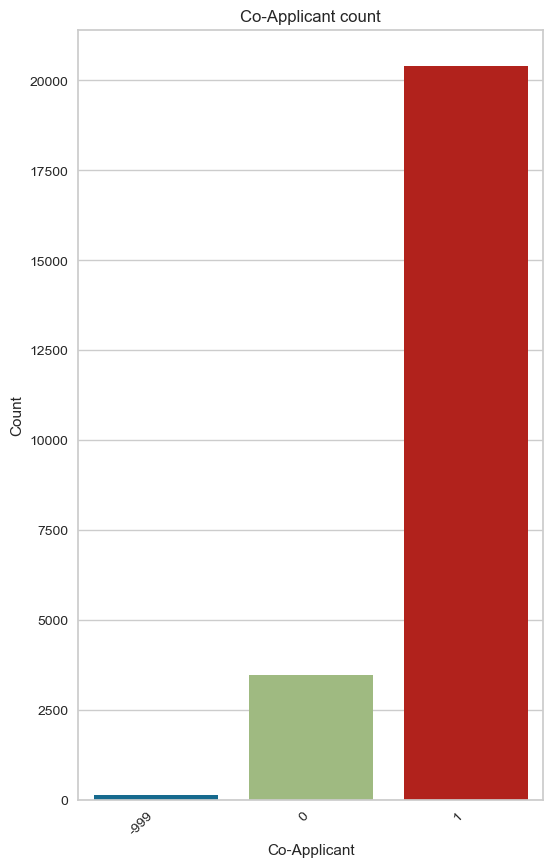

In [92]:
create_bar_plot(loan_amt_train_copy,'Co-Applicant')

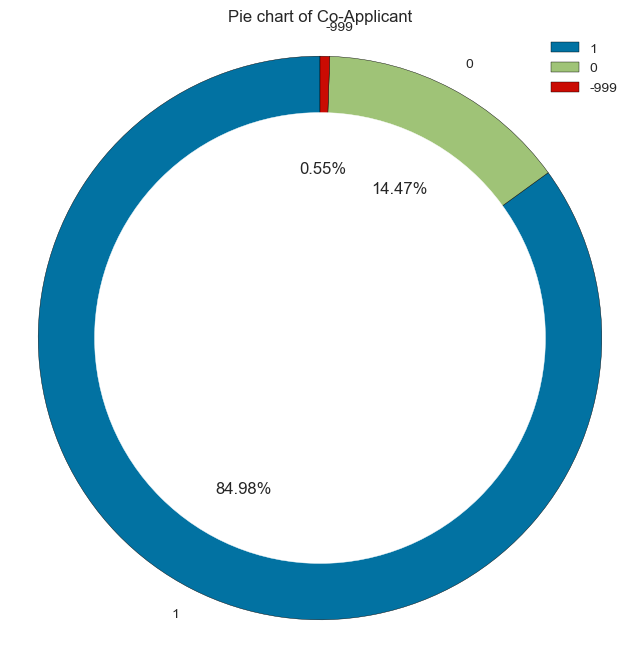

In [93]:
create_donnut_pie_chart(loan_amt_train_copy,'Co-Applicant')

**Interpretation:**
* Most of the applicants have a co-applicants (~85%)
* 14% of the applicants don't have a co-applicant.
* The rest are unknown. (~0.5%)

### 2.3.20 Property Price

In [94]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
gen_info_feat(loan_amt_train_copy,'Property Price')

Description:
count     24000.000
mean     132018.284
std       93566.244
min        -999.000
25%       60793.940
50%      110168.710
75%      179084.020
max     1077966.730
Name: Property Price, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.3990671454033115


<function matplotlib.pyplot.show(close=None, block=None)>

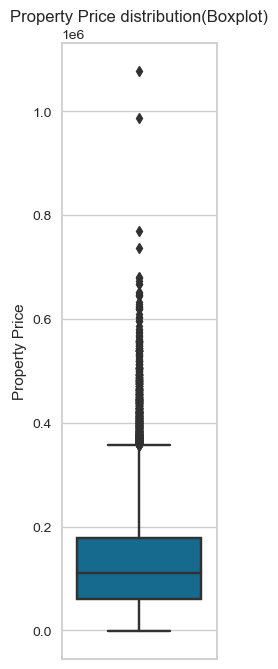

In [95]:
create_box_plot(loan_amt_train_copy,'Property Price')

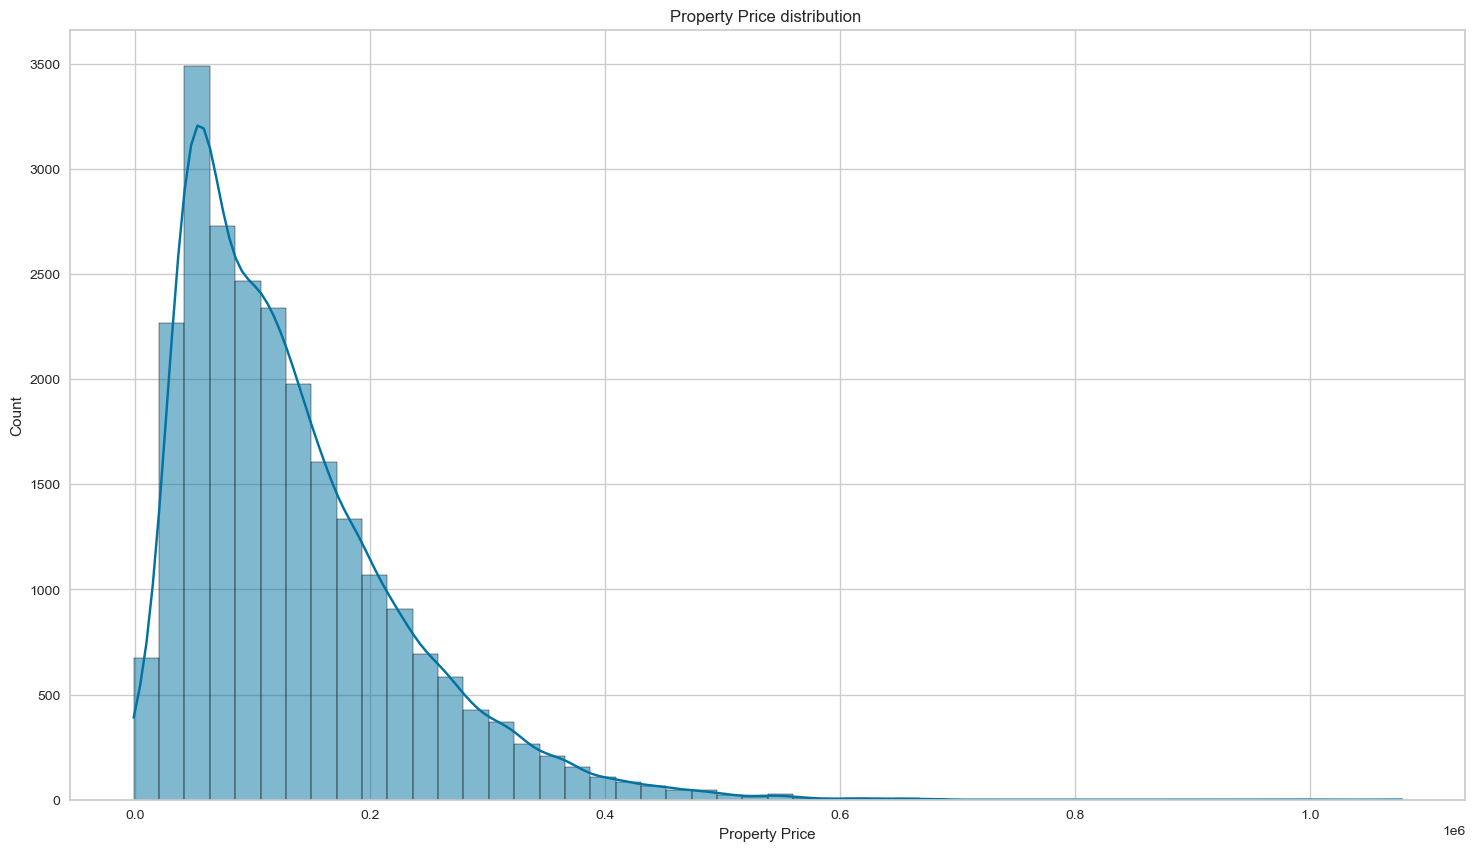

In [96]:
create_hist_plot(loan_amt_train_copy,'Property Price')

**Interpretation:**
* The median property price is $110168.710.
* We hae quite a number of outliers. 
* The distribution of the property price is skewed to the right.

### 2.3.21 Loan Sanction Amount

In [97]:
gen_info_feat(loan_amt_train_copy,'Loan Sanction Amount (USD)')

Description:
count    23725.000
mean     47680.600
std      48224.125
min       -999.000
25%          0.000
50%      35273.020
75%      74217.940
max     395368.740
Name: Loan Sanction Amount (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2072630197126766


<function matplotlib.pyplot.show(close=None, block=None)>

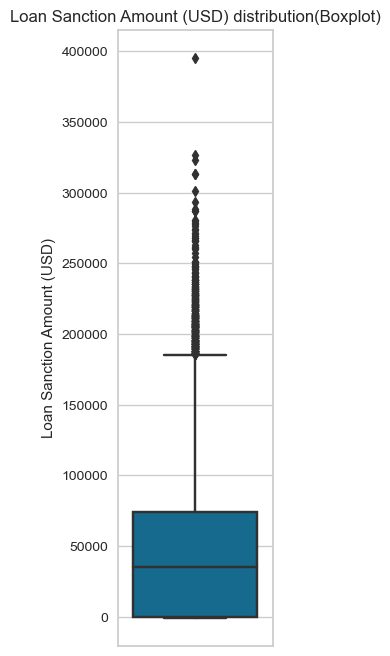

In [98]:
create_box_plot(loan_amt_train_copy,'Loan Sanction Amount (USD)')

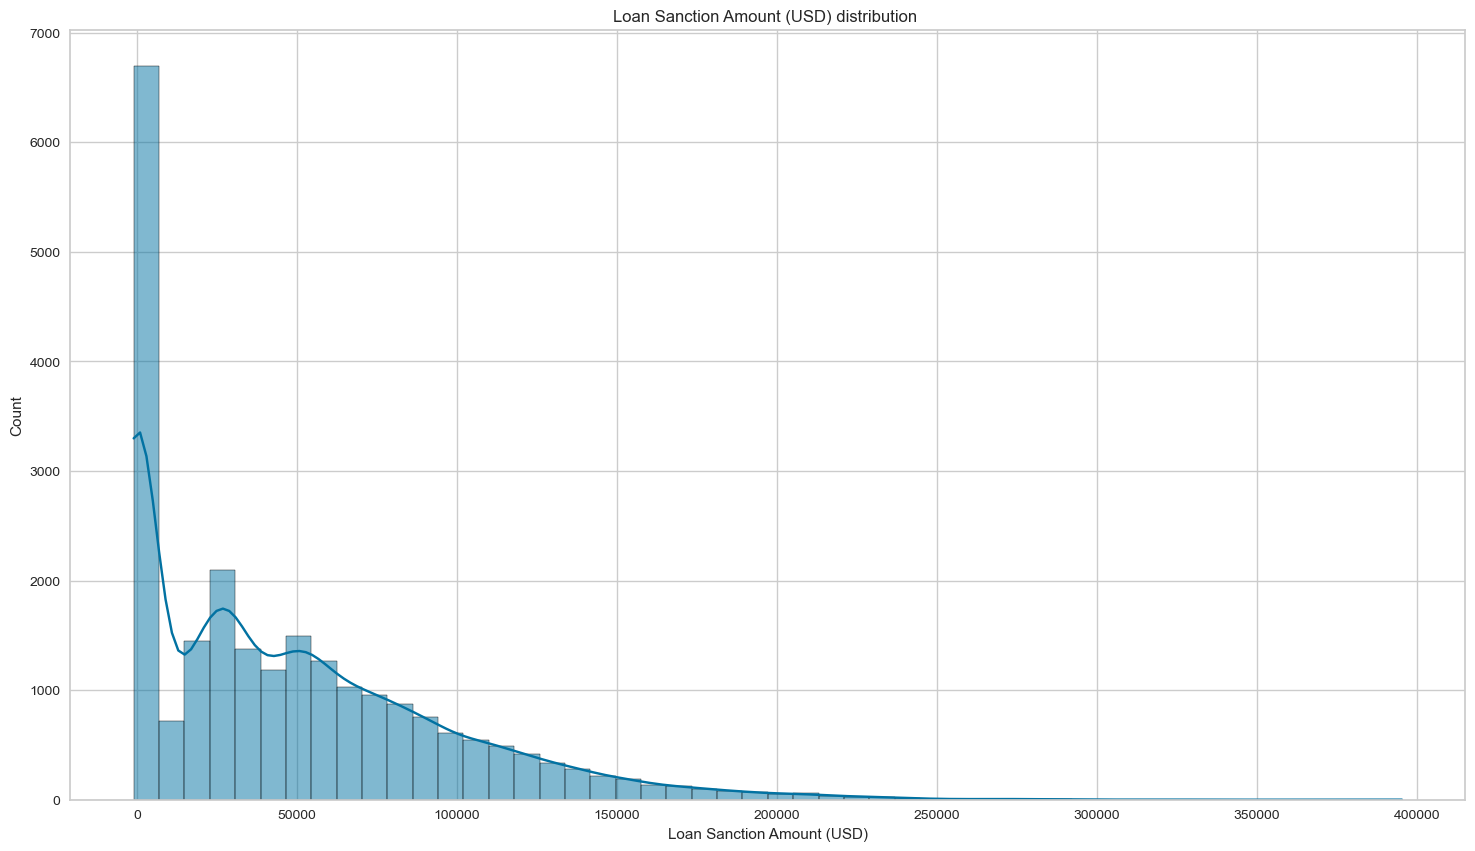

In [99]:
create_hist_plot(loan_amt_train_copy,'Loan Sanction Amount (USD)')

**Interpreation:**
* The median loan sanction amount is 35273.020
* We have quite a number of outliers. 
* The distribution of the loan sanction amount is skewed to the right. 

## 2.4 Bivariate Analysis

### 2.4.1 Numerical vs Numerical Features (Correlation & Scatter Plots)

### 2.4.1.1 Scatter Plots

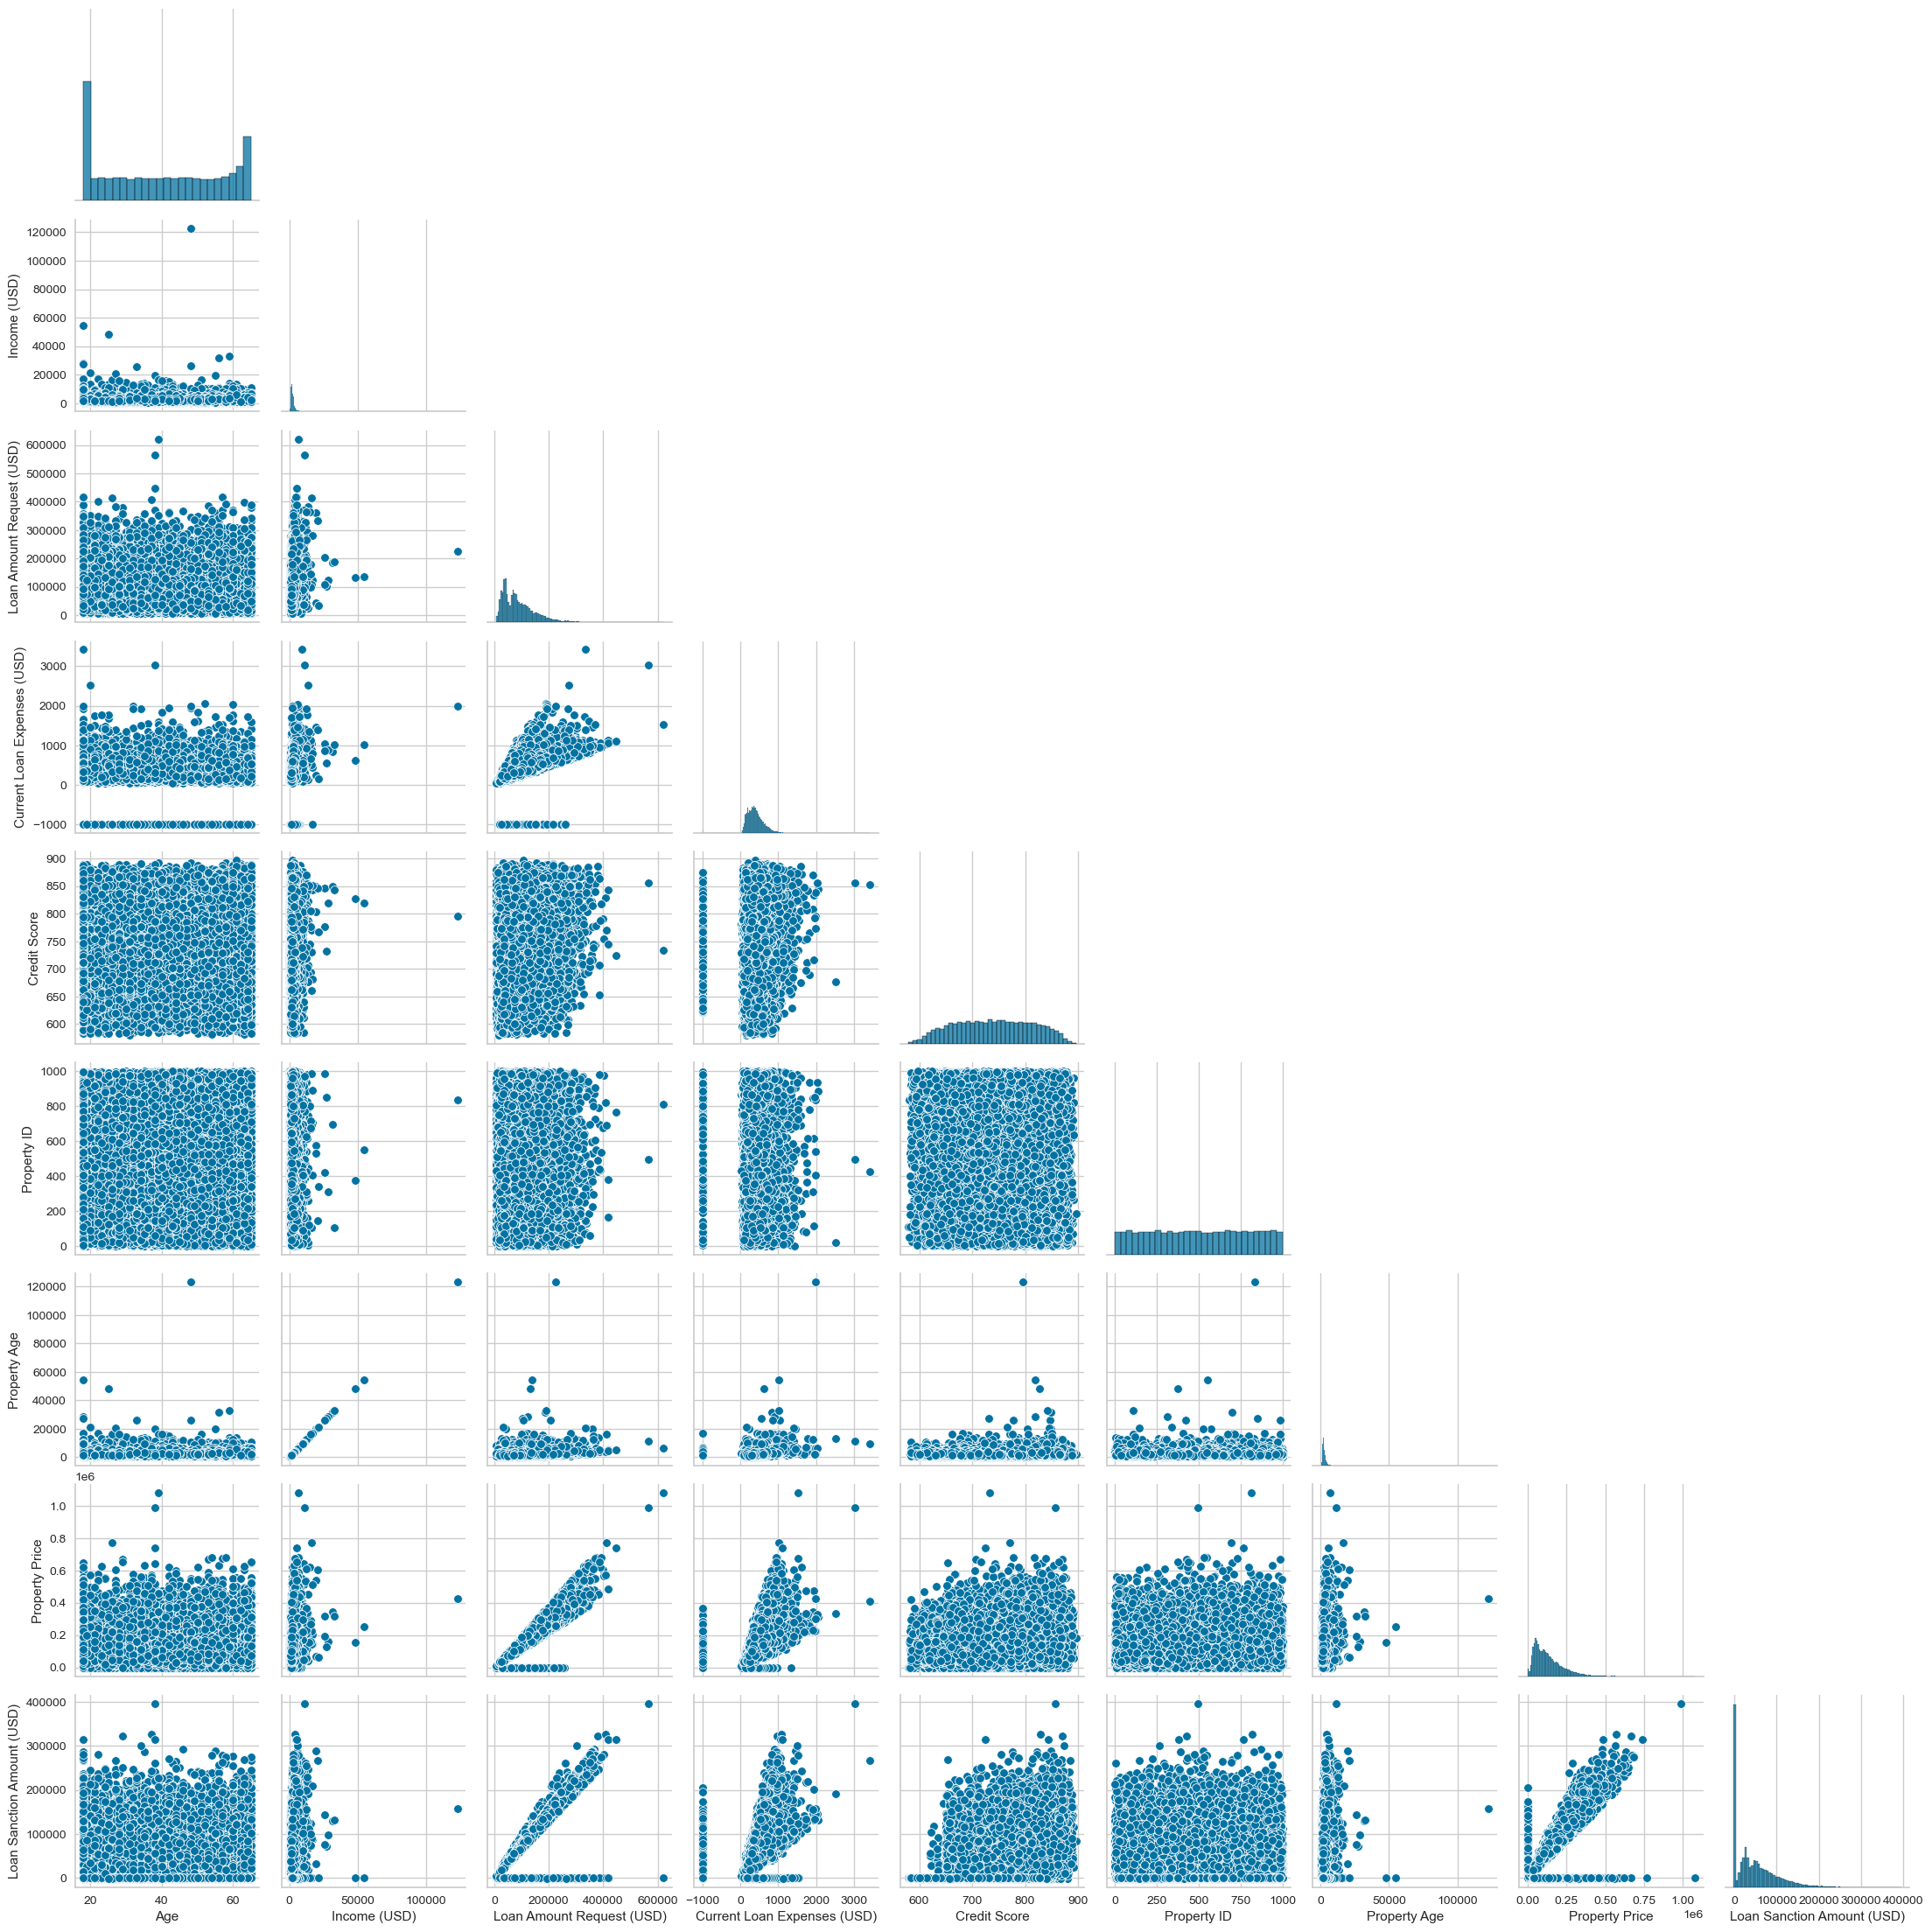

In [100]:
sns.pairplot(loan_amt_train_copy.drop(['Dependents','No. of Defaults','Property Type', 'Co-Applicant'], axis = 1), corner = True)
plt.show()

**Interpretation:**
* There is a positive correlation between the loan amount request and the current loan expenses. 

* There is also a perfect positive correlation between the income and the property age.

* There is also a correlation between property price and loan amount request. 

* There is a collection between loan sanction amount and loan amount request.

* We also find a correlation between property price and current loan expenses. 

* There is a correlation between loan sanction amount and current loan expenses. 

* There is a correlation between property price and loan sanction amount. 

In [101]:
loan_amt_train_copy[['Loan Amount Request (USD)', 'Loan Sanction Amount (USD)']]

Loan Amount Request (USD)  Loan Sanction Amount (USD)
0                     294604.890                  235683.910
1                     132263.080                       0.000
2                     112307.540                   72999.900
3                      24268.350                       0.000
4                      76342.040                   57256.530
...                          ...                         ...
23995                 122864.440                   86005.110
23996                 101151.000                   65748.150
23997                  91833.600                   64283.520
23998                  62065.250                   43445.680
23999                  69496.720                   55597.380

[24000 rows x 2 columns]

### 2.4.1.1 Loan Amount Request vs Current Loan Expenses

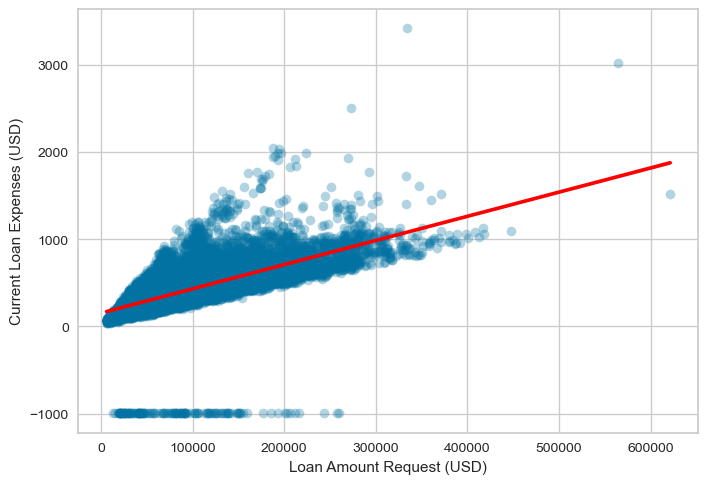

In [102]:
sns.regplot(x = 'Loan Amount Request (USD)', y = 'Current Loan Expenses (USD)', data = loan_amt_train_copy, line_kws = {'color': 'red'}, scatter_kws = {'alpha':0.3})

plt.show()

**Interpretation:**
* The more the loan amount requested, the more the current loan expenses. 

### 2.4.1.1.2 Income vs Property Age

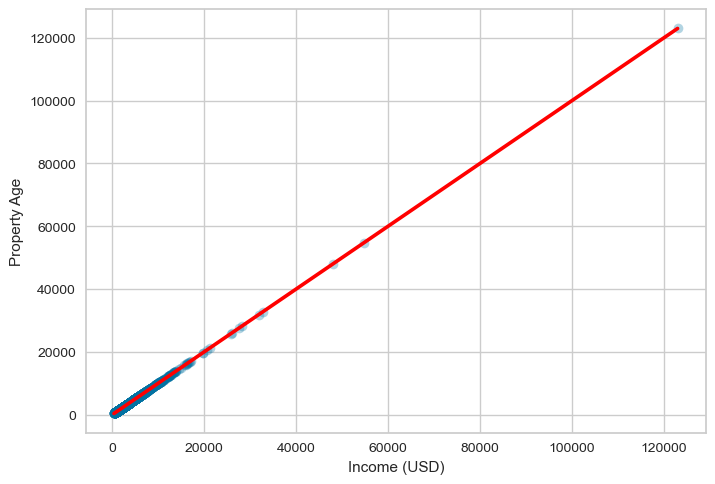

In [103]:
sns.regplot(x = 'Income (USD)', y = 'Property Age', data = loan_amt_train_copy, line_kws = {'color':'red'}, scatter_kws = {'alpha': 0.3})
plt.show()

**Interpretation:**
* We have a perfect correlation between the icome and the property age. 
* The more the income, the older the property. 

### 2.4.1.1.3 Loan Amount Request vs Property Price

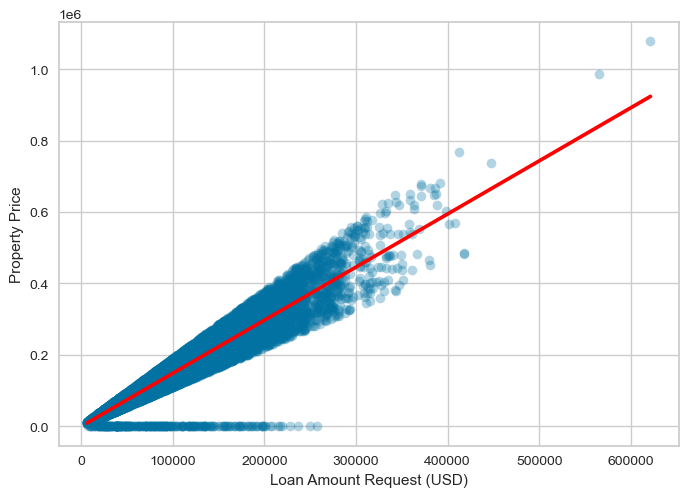

In [104]:
sns.regplot(x = 'Loan Amount Request (USD)', y = 'Property Price', data = loan_amt_train_copy, line_kws = {'color':'red'}, scatter_kws ={'alpha':0.3})
plt.show()

**Interpretation:**
* The more amount of loan requested, the more expensive the property price.


### 2.4.1.1.4 Loan Amount Request vs Loan Sanction Amount

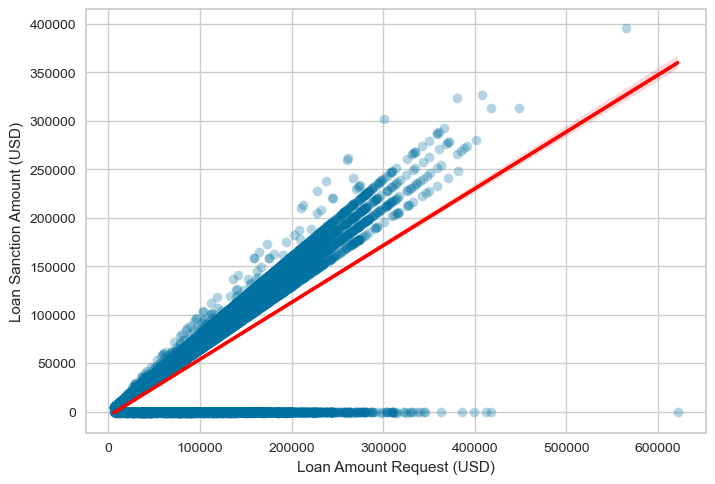

In [105]:
sns.regplot(x = 'Loan Amount Request (USD)', y = 'Loan Sanction Amount (USD)', data = loan_amt_train_copy, line_kws = {'color': 'red'}, scatter_kws = {'alpha':0.3})
plt.show()

**Interpretation:**
* The loan amount requested increases with the loan sanction amount. 

### 2.4.1.1.5 Current Loan Expenses vs Property Price

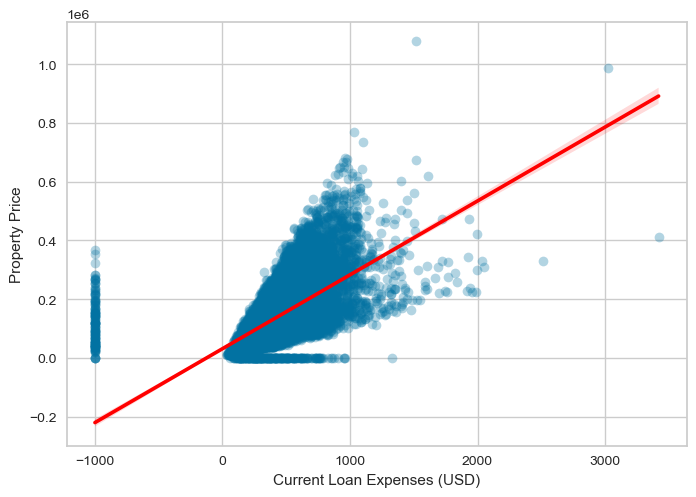

In [106]:
sns.regplot(x = 'Current Loan Expenses (USD)', y = 'Property Price', data = loan_amt_train_copy, line_kws = {'color':'red'}, scatter_kws = {'alpha': 0.3})
plt.show()

**Interpretation:**
* Loan expenses generally increaess with property price.

### 2.4.1.1.6 Current Loan Expenses vs Loan Sanctioned Amount

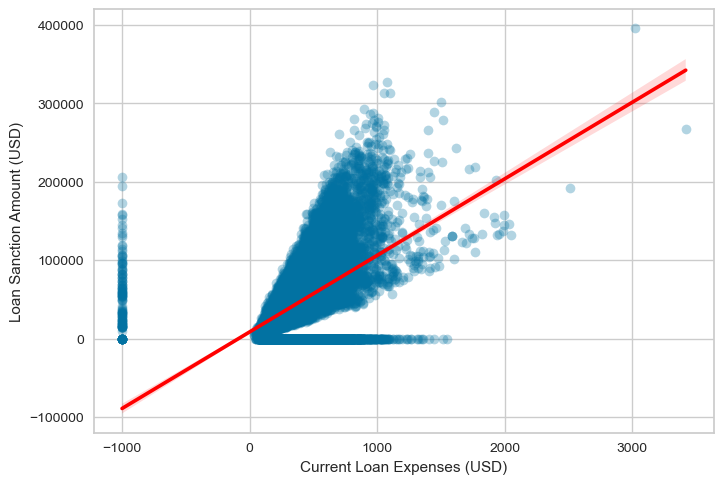

In [107]:
sns.regplot(x = 'Current Loan Expenses (USD)', y = 'Loan Sanction Amount (USD)', data = loan_amt_train_copy, line_kws = {'color':'red'}, scatter_kws = {'alpha':0.3})
plt.show()

**Interpretation:**
* The loan expenses increase as the loan sanction amount increases.

### 2.4.1.1.7 Property Price vs Loan Sanction Amount 

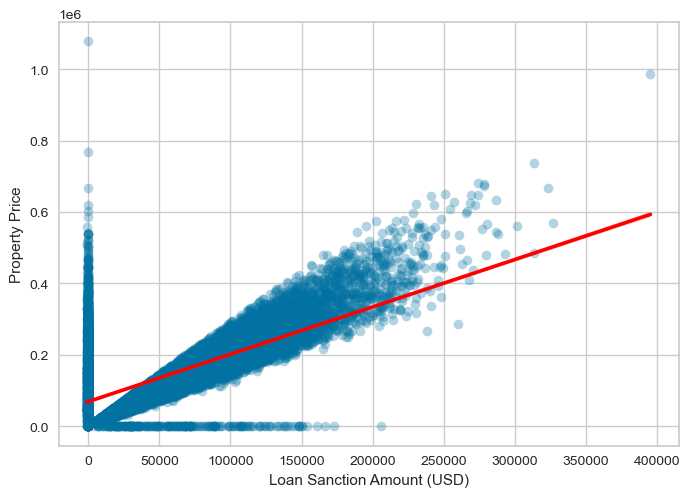

In [108]:
sns.regplot(x = 'Loan Sanction Amount (USD)', y = 'Property Price', data = loan_amt_train_copy, line_kws = {'color':'red'}, scatter_kws = {'alpha':0.3})
plt.show()

**Interpreation:**
* Lan Sanction Amount and the Property Price are positively correlated. 

### 2.4.1.2 Correlation Analysis

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


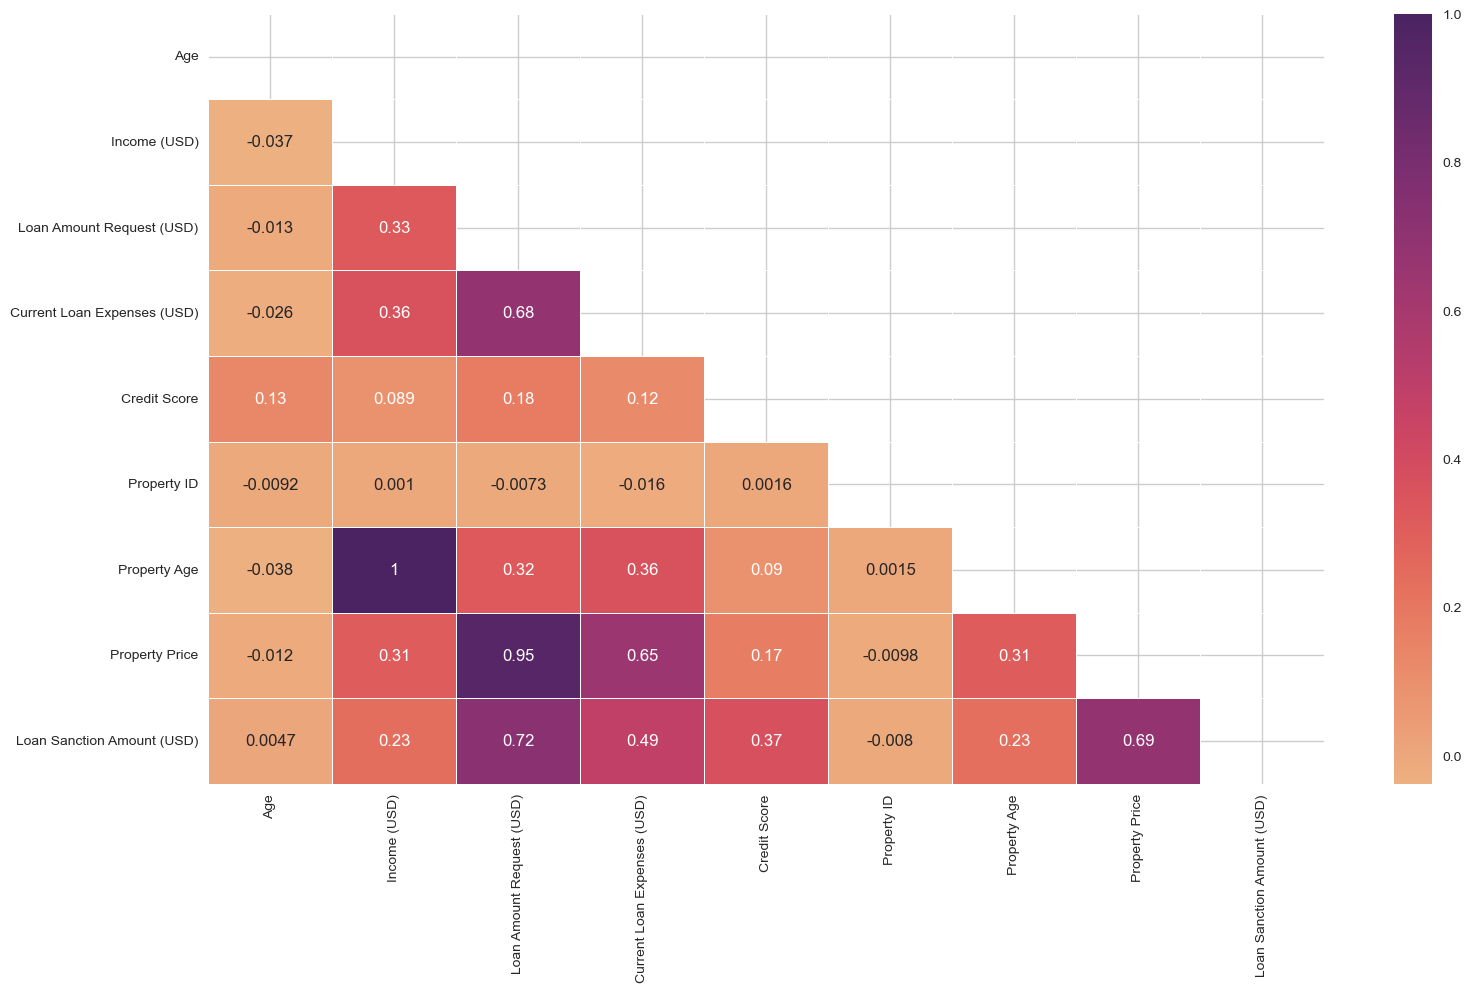

In [109]:
loan_amt_train_copy_corr = loan_amt_train_copy.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(loan_amt_train_copy_corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(loan_amt_train_copy_corr, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

**Interpretation:**
* Income is highly correlated with Property Age.
* Loan Amount Request is highly correlated with Property Price.
* Loan Amount Request is highliy correlated with Loan Sanction Amount. 
* Current Loan Expenses is correlated with Property Price. 
* Current Loan Expenses is correlated with Loan Sanction Amount. 
* Loan Sanction Amount is highly correlated with Propery Price. 

In [110]:
loan_amt_train_copy.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [111]:
loan_amt_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  24000 non-null  object 
 1   Name                         24000 non-null  object 
 2   Gender                       23954 non-null  object 
 3   Age                          24000 non-null  int64  
 4   Income (USD)                 20352 non-null  float64
 5   Income Stability             22676 non-null  object 
 6   Profession                   24000 non-null  object 
 7   Type of Employment           18228 non-null  object 
 8   Location                     24000 non-null  object 
 9   Loan Amount Request (USD)    24000 non-null  float64
 10  Current Loan Expenses (USD)  23872 non-null  float64
 11  Expense Type 1               24000 non-null  object 
 12  Expense Type 2               24000 non-null  object 
 13  Dependents      

### 2.4.2 Numerical vs Categorical Features (ANOVA)

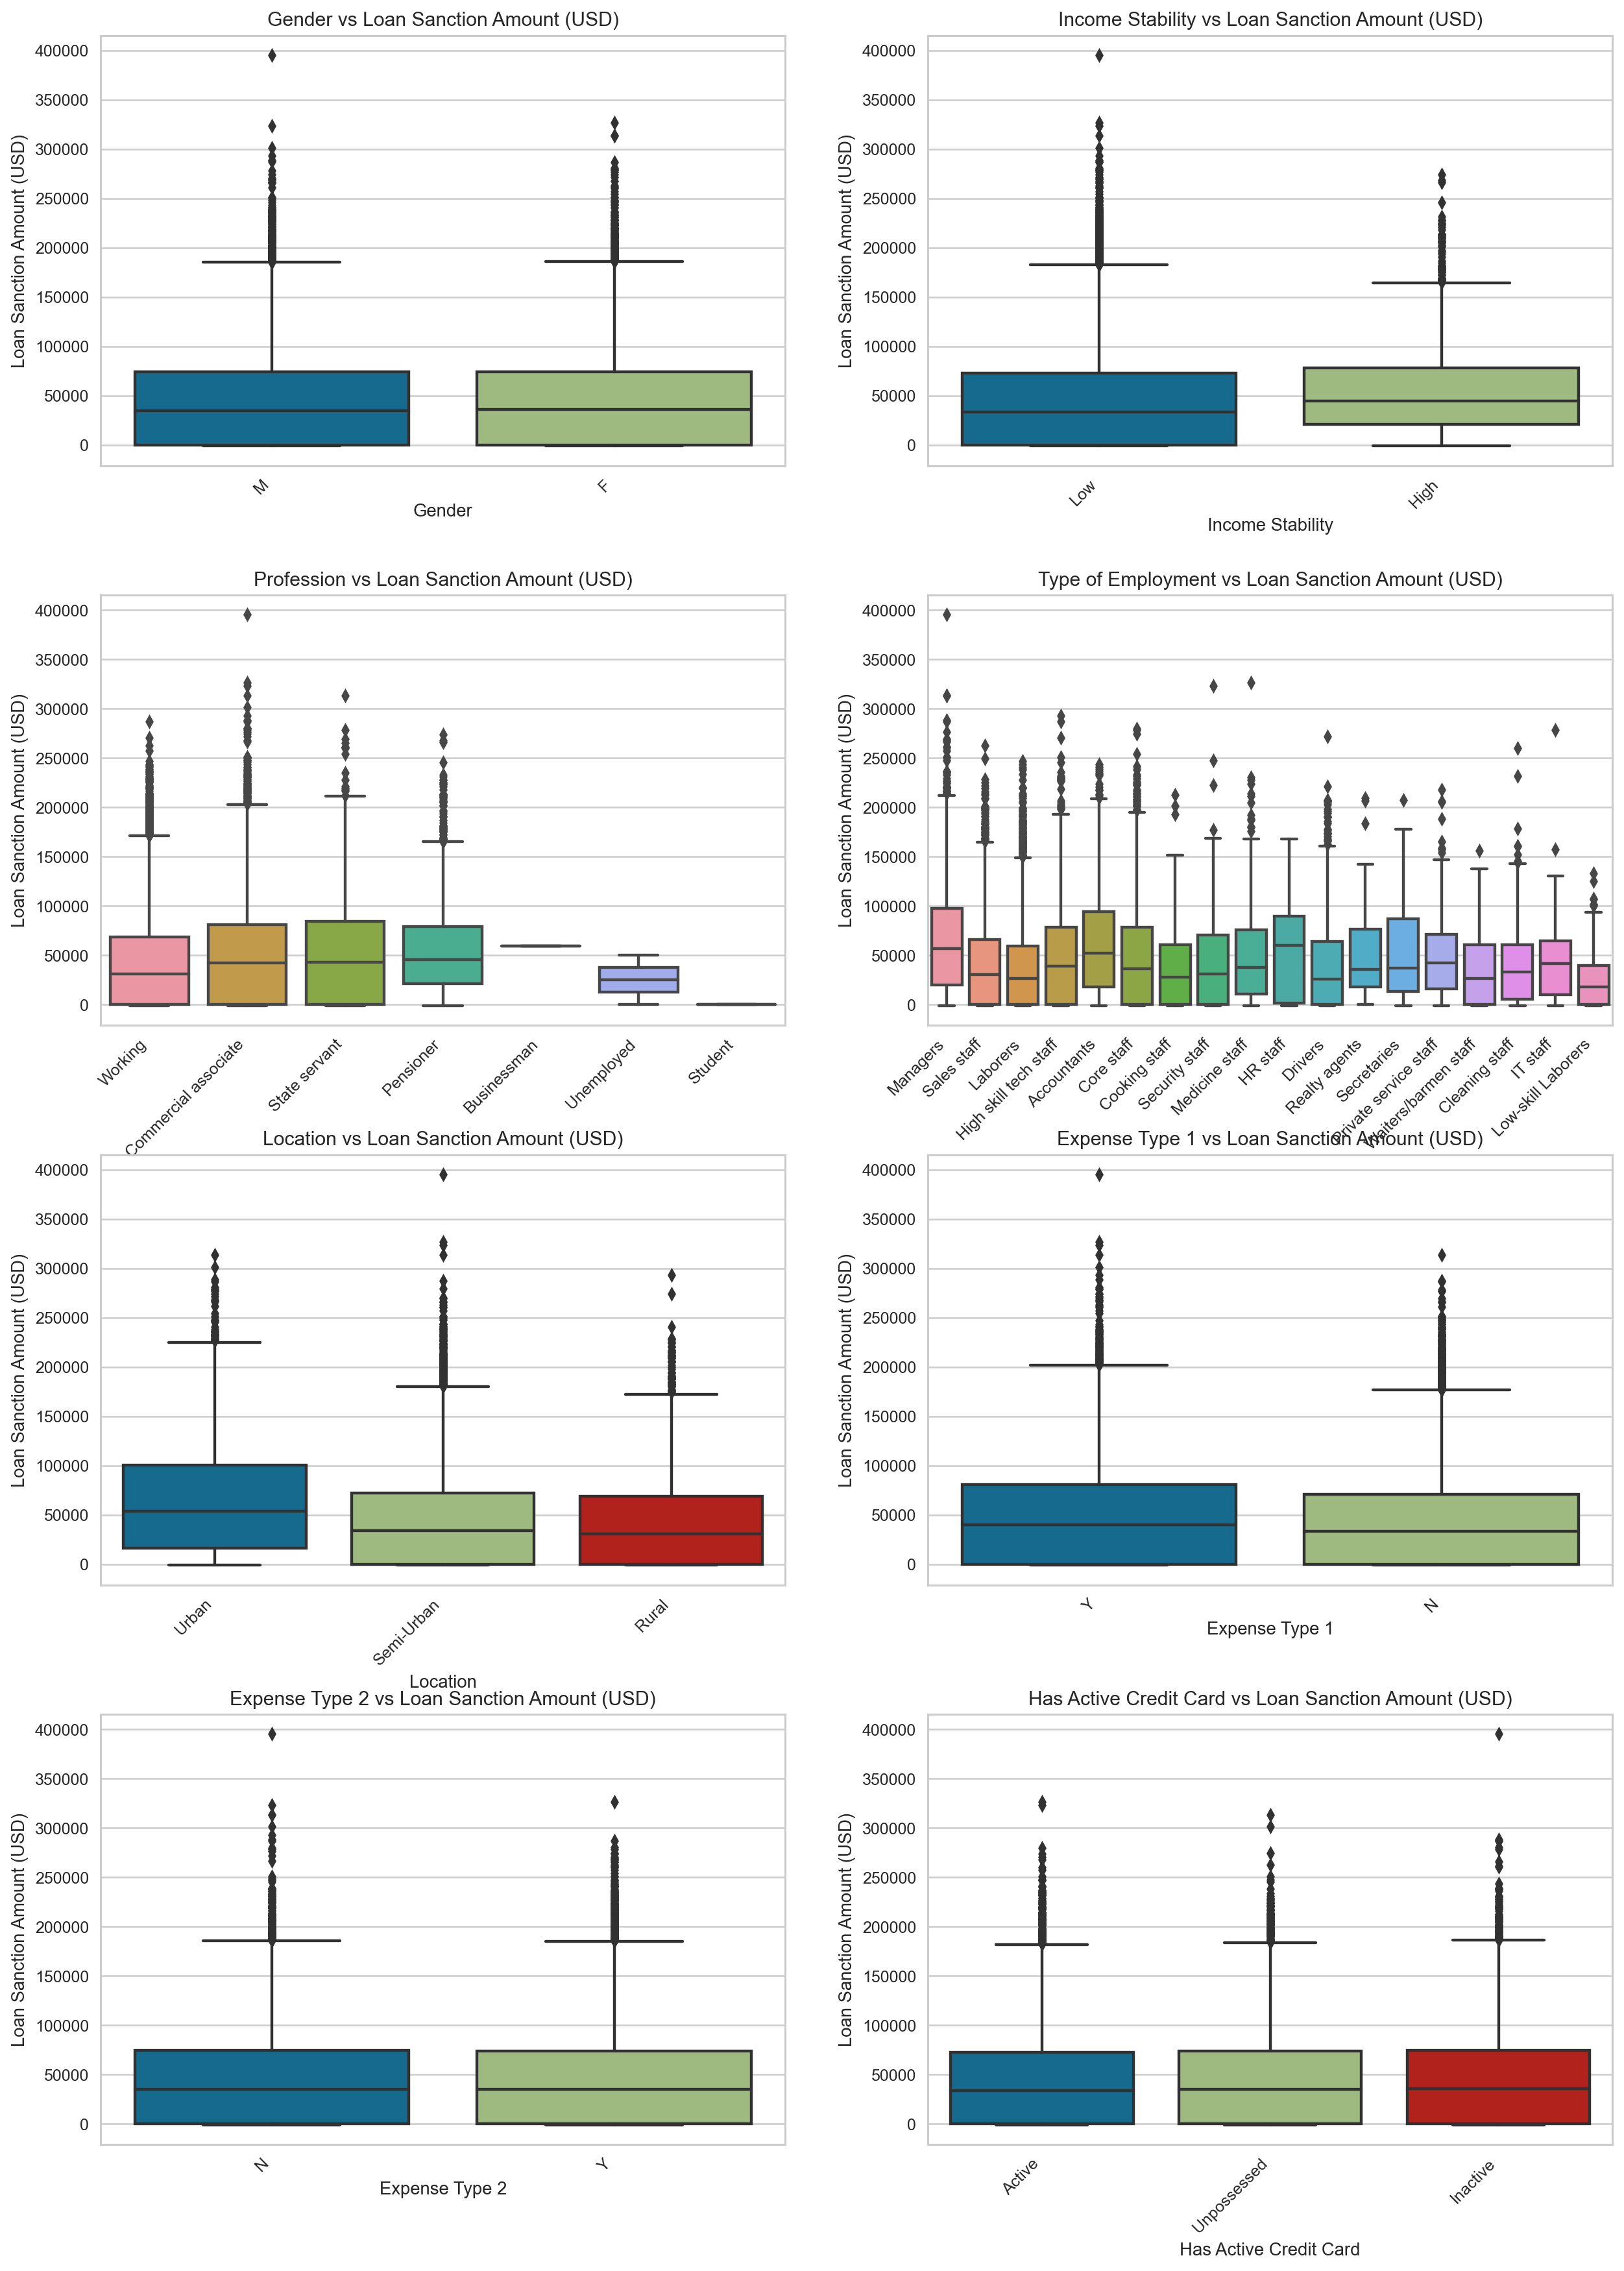

In [112]:
fig, axes = plt.subplots(4, 2, figsize = (15,20), dpi = 180)
fig.tight_layout(pad = 5.0)
cat_features = ['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax = axes[row_count, feat_count], x = loan_amt_train_copy[cat_features[cat_ft_count]], y = loan_amt_train_copy['Loan Sanction Amount (USD)'])
            axes[row_count, feat_count].set_title(cat_features[cat_ft_count] + " vs Loan Sanction Amount (USD)")
            plt.sca(axes[row_count, feat_count])
            plt.xticks(rotation = 45, ha = 'right')
            plt.ylabel('Loan Sanction Amount (USD)')
            cat_ft_count += 1
    break

**Interpretation:**
* People with high income stablility were given a high loan sanction amount. 
* Managers, HR Staff and accounts received a medain loan sanction amount of $5000.
* People who live in urban area recived the highest loan sanction amount. 

# 3. Prepare The Data

## 3.1 Transformation to be done on each feature: 

Customer ID: 
* Drop the feature

Name: 
* Drop the feature

Gender: 
* One hot encoding
* Missing Value (Replace with mode)

Age: 
* Min-max enc

Income: 
* Min-max enc
* Outliers handler
* Missing value (Replace with median)
* Fix skewness

Income stability:
* One hot encoding
* Missing Value (replace with mode)

Profession:
* One hot encoding
* Drop the rows with the least frequent profession (Student, Businessman, Umemployed)

Type of employment:
* Drop the feature

Location:
* One hot encoding

Loan amount request:
* Min-max enc
* Outliers handlers
* fix skewness

Current Loan Expenses:
* -999 handler
* Min-max enc
* Outliers handler
* Missing Values (replace with median)
* Fix Skewness)

Expenses Type 1
* One hot encoding

Expenses Type 2
* One hot encoding 

Dependents:
* Outliers handler
* Missing value (replace with mode)

Credit Score:
* Min-max enc
* Missing Value (replace with the mean/median)

Number of default:
* Nothing to do

Has an active credit card:
* One hot encoding
* Missing value (replace with mode)

Property Id:
* Drop the feature 

Property Age:
* min-max enc
* Outlier Handler
* Misssing value (replace with median)
* Fix skewness

Property type:
* Nothing

Property Location: 
* One hot encoding
* Missing values (replace with mode)

Co-applicant:
* -999 handler

Property price:
* min-max enc
* outlier handler
* fix skweness
* -999 handler

Loan Sanction Amount:
* Missing values( drop the rows)
* -999 handler)

## 3.2 Data Cleaning

### 3.2.1 Outliers Imputer

In [113]:
class OutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_outliers = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Property Age', 'Property Price']):
        self.feat_with_outliers = feat_with_outliers
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_outliers).issubset(df.columns)):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 1.5 * IQR)) | (df[self.feat_with_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

### 3.2.2 Missing Values Imputer

In [114]:
class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, mode_imputed_ft = ['Gender','Income Stability','Dependents','Has Active Credit Card','Property Location'], median_imputed_ft = ['Income (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age']):
        self.mode_imputed_ft = mode_imputed_ft
        self.median_imputed_ft = median_imputed_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.mode_imputed_ft + self.median_imputed_ft).issubset(df.columns)):
            # drop missing values in the target feature
            df.dropna(inplace=True, axis=0, subset=['Loan Sanction Amount (USD)'])
            # impute missing values with mode
            for ft in self.mode_imputed_ft:
                the_mode = df[ft].mode()[0]
                df[ft] = df[ft].fillna(the_mode)
            # impute missing values with median
            for ft in self.median_imputed_ft:
                the_median = df[ft].median()
                df[ft] = df[ft].fillna(the_median)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

### 3.2.3 Remove Less Frequent Professions


In [115]:
class DropUncommonProfession(BaseEstimator, TransformerMixin):
    def __init__(self,profession_list = ['Student','Unemployed','Businessman']):
        self.profession_list = profession_list
    def fit(self,df):
        return self
    def transform(self,df):
        if ('Profession' in df.columns):
            # only keep the professions that are not in the profession_list
            df = df[~df['Profession'].isin(self.profession_list)]
            return df
        else:
            print("Profession feature is not in the dataframe")
            return df

## 3.3 Feature Selection

### 3.3.3 Feature Drop

In [116]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['Customer ID','Name','Type of Employment','Property ID']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

## 3.4 Feature Transformation

### 3.4.1 -999 Value Imputer

In [117]:
class ValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_999_val=['Co-Applicant', 'Current Loan Expenses (USD)', 'Loan Sanction Amount (USD)', 'Property Price']):
        self.feat_with_999_val = feat_with_999_val
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_999_val).issubset(df.columns)):
            for ft in self.feat_with_999_val:
                # replace any occurance of -999.000 with 0
                df[ft].replace(-999.000,0,inplace=True,regex=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

### 3.4.2 Min-Max Scaling (with feature's names)

In [118]:
class MinMaxWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler_ft = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age', 'Property Price']):
        self.min_max_scaler_ft = min_max_scaler_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler_ft).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler_ft] = min_max_enc.fit_transform(df[self.min_max_scaler_ft])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

### 3.4.3 One Hot Encoding (with feature's name)

In [119]:
class OneHotWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,one_hot_enc_ft = ['Gender', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location', 'Income Stability']):
        self.one_hot_enc_ft = one_hot_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.one_hot_enc_ft).issubset(df.columns)):
            # function to one hot encode the features in one_hot_enc_ft
            def one_hot_enc(df,one_hot_enc_ft):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[one_hot_enc_ft])
                # get the result of the one hot encoding columns names
                feat_names_one_hot_enc = one_hot_enc.get_feature_names_out(one_hot_enc_ft)
                # change the array of the one hot encoding to a dataframe with the column names
                df = pd.DataFrame(one_hot_enc.transform(df[self.one_hot_enc_ft]).toarray(),columns=feat_names_one_hot_enc,index=df.index)
                return df
            # function to concatenat the one hot encoded features with the rest of features that were not encoded
            def concat_with_rest(df,one_hot_enc_df,one_hot_enc_ft):
                # get the rest of the features
                rest_of_features = [ft for ft in df.columns if ft not in one_hot_enc_ft]
                # concatenate the rest of the features with the one hot encoded features
                df_concat = pd.concat([one_hot_enc_df, df[rest_of_features]],axis=1)
                return df_concat
            # one hot encoded dataframe
            one_hot_enc_df = one_hot_enc(df,self.one_hot_enc_ft)
            # returns the concatenated dataframe
            full_df_one_hot_enc = concat_with_rest(df,one_hot_enc_df,self.one_hot_enc_ft)
            return full_df_one_hot_enc
        else:
            print("One or more features are not in the dataframe")
            return df

### 3.4.4 Skewness Handler

In [120]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,col_with_skewness=['Income (USD)','Loan Amount Request (USD)','Current Loan Expenses (USD)','Property Age']):
        self.col_with_skewness = col_with_skewness
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.col_with_skewness).issubset(df.columns)):
            # Handle skewness with cubic root transformation
            df[self.col_with_skewness] = np.cbrt(df[self.col_with_skewness])
            return df
        else:
            print('One or more skewed columns are not found')
            return df

## 3.5 Data Preprocessing

In [121]:
def full_pipeline(df):
    pipeline = Pipeline([
        ('outlier remover', OutlierImputer()),
        ('drop uncommon profession', DropUncommonProfession()),
        ('missing value imputer', MissingValueImputer()),
        ('drop features', DropFeatures()),
        ('-999 value imputer', ValueImputer()),
        ('skewness handler', SkewnessHandler()),
        ('min max scaler', MinMaxWithFeatNames()),
        ('one hot encoder', OneHotWithFeatNames())
    ])
    df_pipe_prep = pipeline.fit_transform(df)
    return df_pipe_prep

In [122]:
pd.options.mode.chained_assignment = None
loan_amt_train_copy_prep = full_pipeline(loan_amt_train_copy)

In [123]:
loan_amt_train_copy_prep

Gender_F  Gender_M  Profession_Commercial associate  \
1         0.000     1.000                            0.000   
2         0.000     1.000                            1.000   
3         1.000     0.000                            0.000   
4         1.000     0.000                            0.000   
5         1.000     0.000                            0.000   
...         ...       ...                              ...   
23994     0.000     1.000                            0.000   
23995     1.000     0.000                            0.000   
23997     0.000     1.000                            0.000   
23998     1.000     0.000                            0.000   
23999     0.000     1.000                            0.000   

       Profession_Pensioner  Profession_State servant  Profession_Working  \
1                     0.000                     0.000               1.000   
2                     0.000                     0.000               0.000   
3                     0.000                     0.000               1.000   
4                     0.000                     0.000               1.000   
5                     0.000                     1.000               0.000   
...                     ...                       ...                 ...   
23994                 0.000                     0.000               1.000   
23995                 0.000                     0.000               1.000   
23997                 0.000                     0.000               1.000   
23998                 0.000                     0.000               1.000   
23999                 0.000                     0.000               1.000   

       Location_Rural  Location_Semi-Urban  Location_Urban  Expense Type 1_N  \
1               0.000                1.000           0.000             1.000   
2               0.000                1.000           0.000             1.000   
3               1.000                0.000           0.000             1.000   
4               0.000                1.000           0.000             1.000   
5               1.000                0.000           0.000             1.000   
...               ...                  ...             ...               ...   
23994           0.000                1.000           0.000             1.000   
23995           1.000                0.000           0.000             1.000   
23997           0.000                1.000           0.000             1.000   
23998           0.000                1.000           0.000             1.000   
23999           0.000                1.000           0.000             1.000   

       Expense Type 1_Y  Expense Type 2_N  Expense Type 2_Y  \
1                 0.000             1.000             0.000   
2                 0.000             0.000             1.000   
3                 0.000             1.000             0.000   
4                 0.000             0.000             1.000   
5                 0.000             0.000             1.000   
...                 ...               ...               ...   
23994             0.000             0.000             1.000   
23995             0.000             0.000             1.000   
23997             0.000             0.000             1.000   
23998             0.000             0.000             1.000   
23999             0.000             0.000             1.000   

       Has Active Credit Card_Active  Has Active Credit Card_Inactive  \
1                              1.000                            0.000   
2                              1.000                            0.000   
3                              0.000                            0.000   
4                              0.000                            1.000   
5                              0.000                            0.000   
...                              ...                              ...   
23994                          0.000                            0.000   
23995                          1.00

In [124]:
X_loan_amt_train_prep, y_loan_amt_train_prep = loan_amt_train_copy_prep.loc[:, loan_amt_train_copy_prep.columns != 'Loan Sanction Amount (USD)'], loan_amt_train_copy_prep['Loan Sanction Amount (USD)']

In [125]:
X_loan_amt_train_prep

Gender_F  Gender_M  Profession_Commercial associate  \
1         0.000     1.000                            0.000   
2         0.000     1.000                            1.000   
3         1.000     0.000                            0.000   
4         1.000     0.000                            0.000   
5         1.000     0.000                            0.000   
...         ...       ...                              ...   
23994     0.000     1.000                            0.000   
23995     1.000     0.000                            0.000   
23997     0.000     1.000                            0.000   
23998     1.000     0.000                            0.000   
23999     0.000     1.000                            0.000   

       Profession_Pensioner  Profession_State servant  Profession_Working  \
1                     0.000                     0.000               1.000   
2                     0.000                     0.000               0.000   
3                     0.000                     0.000               1.000   
4                     0.000                     0.000               1.000   
5                     0.000                     1.000               0.000   
...                     ...                       ...                 ...   
23994                 0.000                     0.000               1.000   
23995                 0.000                     0.000               1.000   
23997                 0.000                     0.000               1.000   
23998                 0.000                     0.000               1.000   
23999                 0.000                     0.000               1.000   

       Location_Rural  Location_Semi-Urban  Location_Urban  Expense Type 1_N  \
1               0.000                1.000           0.000             1.000   
2               0.000                1.000           0.000             1.000   
3               1.000                0.000           0.000             1.000   
4               0.000                1.000           0.000             1.000   
5               1.000                0.000           0.000             1.000   
...               ...                  ...             ...               ...   
23994           0.000                1.000           0.000             1.000   
23995           1.000                0.000           0.000             1.000   
23997           0.000                1.000           0.000             1.000   
23998           0.000                1.000           0.000             1.000   
23999           0.000                1.000           0.000             1.000   

       Expense Type 1_Y  Expense Type 2_N  Expense Type 2_Y  \
1                 0.000             1.000             0.000   
2                 0.000             0.000             1.000   
3                 0.000             1.000             0.000   
4                 0.000             0.000             1.000   
5                 0.000             0.000             1.000   
...                 ...               ...               ...   
23994             0.000             0.000             1.000   
23995             0.000             0.000             1.000   
23997             0.000             0.000             1.000   
23998             0.000             0.000             1.000   
23999             0.000             0.000             1.000   

       Has Active Credit Card_Active  Has Active Credit Card_Inactive  \
1                              1.000                            0.000   
2                              1.000                            0.000   
3                              0.000                            0.000   
4                              0.000                            1.000   
5                              0.000                            0.000   
...                              ...                              ...   
23994                          0.000                            0.000   
23995                          1.00

In [126]:
y_loan_amt_train_prep

1           0.000
2       72999.900
3           0.000
4       57256.530
5           0.000
           ...   
23994       0.000
23995   86005.110
23997   64283.520
23998   43445.680
23999   55597.380
Name: Loan Sanction Amount (USD), Length: 21477, dtype: float64

# 4. Short-list Promising Models

## 4.1 Model Training

In [127]:
from sklearn.ensemble import AdaBoostRegressor
import os

In [128]:
Regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Elastic Net Regression': ElasticNet(random_state=42),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regression': AdaBoostRegressor(random_state=42),
    'Bagging Regression': BaggingRegressor(random_state=42),
    'Extra Trees Regression': ExtraTreesRegressor(random_state=42),
    'Kernel Ridge Regression': KernelRidge(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Stochastic Gradient Descent Regression': SGDRegressor(random_state=42),
    'SVM Regression': SVR(),
    'Gaussian Process Regression': GaussianProcessRegressor(random_state=42),
    'Neural Network Regression': MLPRegressor(random_state=42)
}

In [129]:
def fit_score_model(model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep):
    rmse_scores_path = Path('saved_models/{0}/rmse_{0}'.format(model_name))
    try:
        #check if the file exists
        rmse_scores_path.resolve(strict = True)
    except FileNotFoundError:
        scores = cross_val_score(model, X_loan_amt_train_prep, y_loan_amt_train_prep, cv = 3, scoring = 'neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        with open('rmse_scores_path', 'w') as file_obj:
            file_obj.write('Score: {}'.format(rmse_scores))
#         print()
#         print('Mean Scores: {}'.format(rmse_scores.mean()))
#         print('Standard Deviation: {}'.format(rmse_std()))
            joblib.dump(rmse_scores, 'saved_models/{0}/rmse_{0}'.format(model_name) )
    else:
        rmse_scores = joblib.load('saved_models/{0}/rmse_{0}'.format(model_name))
        print('Score: {}'.format(rmse_scores))
        print('Mean Score: {}'.format(rmse_scores.mean()))
        print('Standard Deviation: {}'.format(rmse_scores.std()))

In [130]:
def folder_check_model(model_name):
    # check if the folder for saving the model exists, if not create it
    if not os.path.exists('saved_models/{0}/rmse_{0}'.format(model_name)):
        os.makedirs('saved_models/{0}/rmse_{0}'.format(model_name))

# loop over all the models


In [ ]:
for model_name, model in Regressors.items():
    # title formatting
    print('\n')
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')
    # check if the folder for saving the model exists, if not create it
    folder_check_model(model_name)
    # fit and score the model
    fit_score_model(model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep)

## 4.2 Top 4 Models

* Random Forest Regressor
* Gradient Boosting Regressor
* Extra Trees Regression
* Bagging Regression

# 5. Fine Tuning The Model

In [132]:
def feat_importance(model_trn, model_name):
    # change xtick font size
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    #top 10 most predictive features
    top_10_feat = FeatureImportances(model_trn, relative = False, topn = 10)
    #top 10 least predictive features
    bottom_10_feat = FeatureImportances(model_trn, relative = False, topn =-10)
    #change the figure size
    plt.figure(figsize = (10,4))
    #change x label font size 
    plt.xlabel('xlabel', fontsize = 14)
    # fit to get the feature importances 
    top_10_feat.fit(X_loan_amt_train_prep, y_loan_amt_train_prep)
    #show the plot
    top_10_feat.show()
    print('\n')
    plt.figure(figsize = (10,4))
    plt.xlabel('xlabel',fontsize = 14)
    #fit to get the feature importances
    bottom_10_feat.fit(X_loan_amt_train_prep, y_loan_amt_train_prep)
    # show the plot
    bottom_10_feat.show()
    print('\n')

In [133]:
def shap_ft_importance(model_name, X_loan_amt_train_prep, y_loan_amt_train_prep):
    #get the model
    model = model
    # fit the model
    model.fit(X_loan_amt_train_prep, y_loan_amt_train_prep)
    # load the JS visualization code to the notebook
    shap.initjs()
    #get the shap values
    shap_values = shap.TreeExplainer(model).shap_values(X_loan_amt_train_prep)
    # get the feature importance
    shap_ft_importance = shap.summary_plot(shap_values, features = X_loan_amt_train_prep)
    plt.savefig('saved_final_models/{0}/shap_ft_importance_{0}.png'.format(model_name))

In [134]:
def train_model(best_model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep):
    trained_model_path = Path('saved_final_models/{0}/trained_{0}'.format(model_name))
    try:
        trained_model_path.resolve(strict = True)
    except FileNotFoundError:
        #train the model with the best parameters
        best_model_trn = best_model.fit(X_loan_amt_train_prep, y_loan_amt_train_prep)
        joblib.dump(best_model_trn, 'saved_final_models/{0}/trained_{0}'.format(model_name))
    else:
        best_model_trn = joblib.load('saved_final_modles/{0}/trained_{0}'.format(model_name))
    return best_model_trn 

In [135]:
def fine_tune_model(model_name,model, parameters, X_loan_amt_train_prep, y_loan_amt_train_prep):
    folder_check_model(model_name)
    rand_search_path = Path('saved_final_models/{0}/rand_search_{0}'.format(model_name))
    try:
        rand_search_path.resolve(strict=True)
    except FileNotFoundError:
        rand_search = RandomizedSearchCV(model, parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, verbose=5, return_train_score=True)
        rand_search.fit(X_loan_amt_train_prep, y_loan_amt_train_prep)
        joblib.dump(rand_search, 'saved_final_models/{0}/rand_search_{0}'.format(model_name))
        best_model = rand_search.best_estimator_
        rand_res = rand_search.cv_results_
        print('*'*50)
        for mean_score, params in zip(rand_res['mean_test_score'], rand_res['params']):
            print(np.sqrt(-mean_score), params)
    else:
        rand_search = joblib.load('saved_final_models/{0}/rand_search_{0}'.format(model_name))
        best_model = rand_search.best_estimator_
        rand_res = rand_search.cv_results_
        for mean_score, params in zip(rand_res['mean_test_score'], rand_res['params']):
            print(np.sqrt(-mean_score), params)
    return best_model

In [136]:
def folder_check_model(model_name):
    # check if the folder for saving the model exists, if not create it
    if not os.path.exists('saved_final_models/{}/'.format(model_name)):
        os.makedirs('saved_final_models/{}/'.format(model_name))
    

## 5.1 Random Forest Regression

In [137]:
parameters = [
    {'bootstrap':[True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['1.0','sqrt'],
     'min_samples_leaf': [1,2,4],
     'min_samples_split': [2,5,10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
]

In [138]:
rand_forest_dict = {'Random Forest Regression': RandomForestRegressor(random_state = 42)}


In [148]:
model_name, model = list(rand_forest_dict.keys())[0], list(rand_forest_dict.values())[0]

In [149]:
best_model = fine_tune_model(model_name, model, parameters, X_loan_amt_train_prep, y_loan_amt_train_prep)

Fitting 3 folds for each of 10 candidates, totalling 30 fits



18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParame

**************************************************
nan {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': '1.0', 'max_depth': 80, 'bootstrap': False}
nan {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': '1.0', 'max_depth': 20, 'bootstrap': False}
nan {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': '1.0', 'max_depth': 80, 'bootstrap': True}
nan {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': '1.0', 'max_depth': 70, 'bootstrap': False}
nan {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': '1.0', 'max_depth': 90, 'bootstrap': True}
21132.483526505595 {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
nan {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': '1.0', 'max_depth': 10, 'bootstrap': False}


In [150]:
best_rand_for_trn = train_model(best_model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


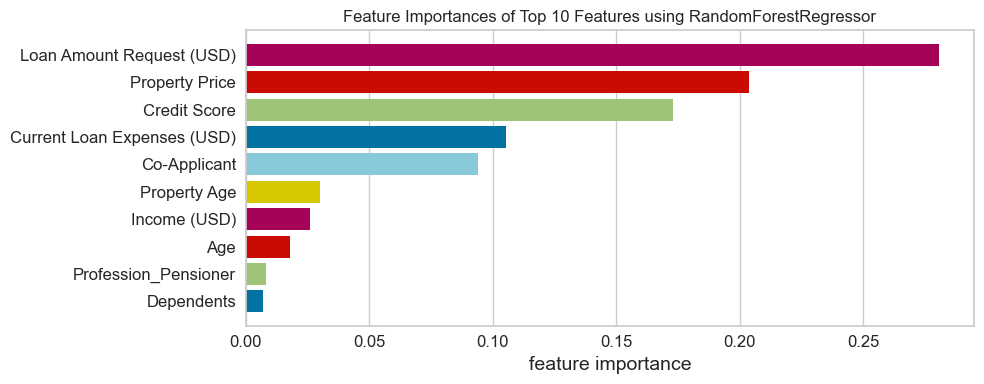

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


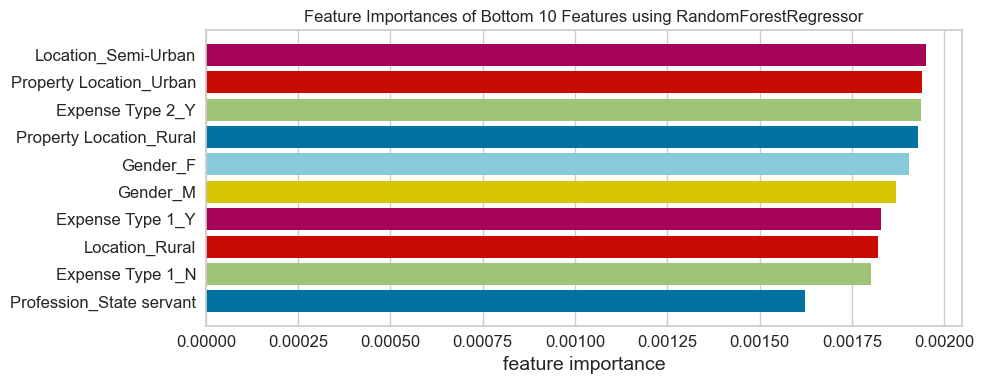

In [151]:
feat_importance(best_rand_for_trn, model_name)

## 5.2 Gradient Boosting Regression

In [152]:
parameters = [
    {
        'n_estimators': [5, 50, 100, 250, 500, 1000, 1500, 2000],
        'max_depth': [1,3,5,7,9],
        'loss': ['squared_error','absolute_error','huber','quantile'],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint = True),
        'max_features': ['auto','sqrt'],
    }
]

In [153]:
grad_boost_dict = {'Gradient Boosting Regression': GradientBoostingRegressor(random_state = 42)}

In [154]:
model_name, model = list(grad_boost_dict.keys())[0], list(grad_boost_dict.values())[0]

In [155]:
best_model = fine_tune_model(model_name, model, parameters, X_loan_amt_train_prep, y_loan_amt_train_prep)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


One or more of the test scores are non-finite: [-4.78211334e+08             nan -1.61865074e+09 -5.34040070e+09
 -8.42736380e+08 -1.14987988e+09 -1.72895809e+09 -1.71181610e+09
 -1.27727900e+09 -8.85726716e+08]
One or more of the train scores are non-finite: [-3.97947060e+08             nan -1.61744998e+09 -5.33983620e+09
 -8.25352028e+08 -1.14309459e+09 -1.72866879e+09 -1.71113087e+09
 -1.27348204e+09 -8.77203799e+08]


**************************************************
21868.043679595405 {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 9, 'loss': 'squared_error', 'learning_rate': 0.1}
nan {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 0.4, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'quantile', 'learning_rate': 10}
40232.45875239831 {'n_estimators': 5, 'min_samples_split': 2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 1, 'loss': 'absolute_error', 'learning_rate': 0.1}
73078.0452391279 {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 5, 'loss': 'quantile', 'learning_rate': 0.0001}
29029.9221545559 {'n_estimators': 1500, 'min_samples_split': 10, 'min_samples_leaf': 0.30000000000000004, 'max_features': 'auto', 'max_depth': 3, 'loss': 'squared_error', 'learning_rate': 0.1}
33909.87877453042 {'n_estimators': 50, 'min_samples_split': 5, 'min_sampl

In [156]:
best_grad_boost_trn = train_model(best_model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep)

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


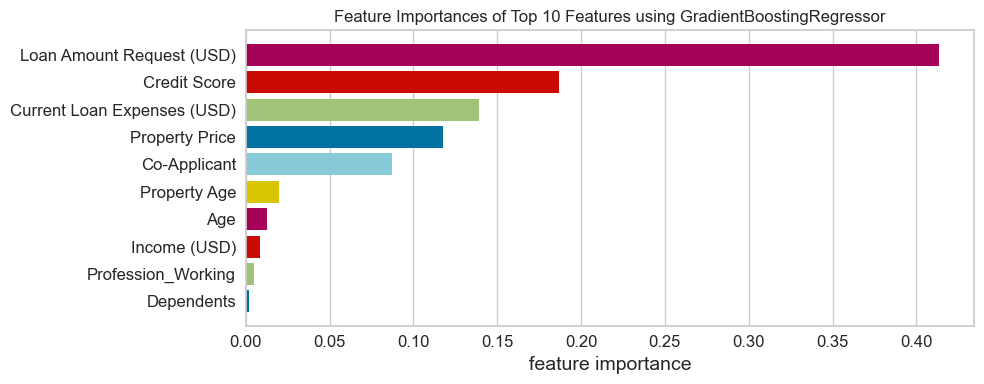

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


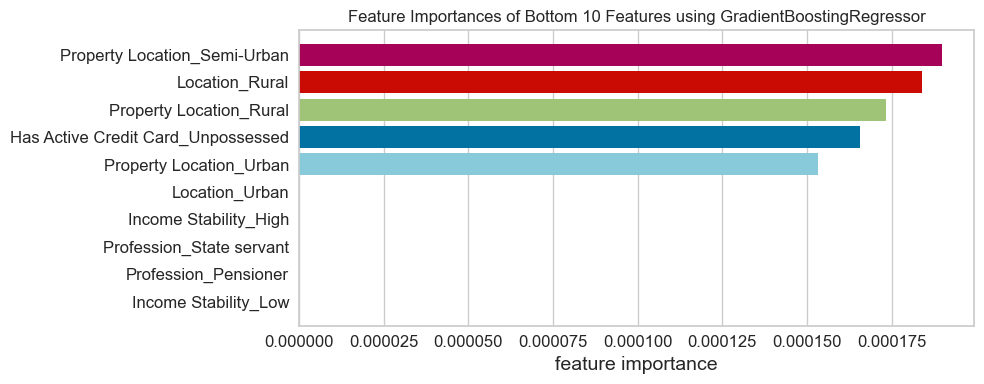

In [157]:
feat_importance(best_grad_boost_trn, model_name)

## 5.3 Extra Trees Regression

In [ ]:
n_samples = X_loan_amt_train_prep.shape[0]
n_features = X_loan_amt_train_prep.shape[1]

parameters = [
    {
        'n_estimators': [10, 50, 100, 500, 1000, 2000],
        'max_depth': [None, 2, 5, ],
        'min_samples_split': [2, 0.5, n_samples //2,],
        'min_samples_leaf': [1, 0.5, n_samples//2,],
        'criterion': ['squared_error','absolute_error'],
        'max_features': [None, 'sqrt','auto','log2', 0.3, 0.5, n_features//2],
        'bootstrap': [True, False]
    }
]

In [ ]:
extra_trees_dict = {'Extra Trees Regression': ExtraTreesRegressor(random_state = 42)}

In [ ]:
model_name, model = list(extra_trees_dict.keys())[0], list(extra_trees_dict.values())[0]

In [ ]:
folder_check_model(model_name)

In [ ]:
best_model = fine_tune_model(model_name, model, parameters, X_loan_amt_train_prep, y_loan_amt_train_prep)

In [ ]:
best_extra_tree_trn = train_model(best_model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep)

In [ ]:
feat_importance(best_extra_tree_trn, model_name)

## 5.4 Bagging Regression

In [ ]:
parameters = [
    {
        'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
        'n_estimators': [20, 50, 100],
        'max_samples':[0.5, 1.0, n_samples//2,],
        'max_features': [0.5,1.0,n_features//2],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
        
    }
]

In [ ]:
bagging_reg_dict = {'Bagging Regression': BaggingRegressor(random_state = 42)}

In [ ]:
model_name, model = list(bagging_reg_dict.keys())[0], list(bagging_reg_dict.values())[0]

In [ ]:
folder_check_model(model_name)

In [ ]:
best_model = fine_tune_model(model_name, model, parameters, X_loan_amt_train_prep, y_loan_amt_train_prep)

In [ ]:
best_bagging_trn = train_model(best_model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep)

## 5.5 Final Model

I did hyperparameters tuning for the top 4 models, but only the random forest regressor yeild an improved score. I will use that model with those parameters.

In [158]:
best_rand_for_trn

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_split=10, n_estimators=200, random_state=42)

# 6. Testing the final model on the test dataset

In [159]:
loan_amt_test_copy.head()

Customer ID             Name Gender  Age  Income (USD) Income Stability  \
0     C-25648   Necole Newbold      M   48      2631.710              Low   
1     C-27924      Ranee Yager      F   58      4445.650              NaN   
2     C-27842     Ivory Toledo      M   25      1586.370              Low   
3      C-7269     Todd Turcios      F   18           NaN              Low   
4     C-47464  Beatriz Lessman      F   36      1591.720              Low   

             Profession Type of Employment    Location  \
0               Working            Drivers  Semi-Urban   
1  Commercial associate           Laborers       Urban   
2  Commercial associate        Sales staff  Semi-Urban   
3  Commercial associate         Core staff  Semi-Urban   
4               Working        Sales staff  Semi-Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                  65466.320                      519.540              Y   
1                  88846.600                      392.920              Y   
2                 142786.480                      479.470              N   
3                 119311.640                      433.590              N   
4                  48373.340                      241.160              N   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              Y       4.000       646.630                0   
1              Y       3.000       701.170                0   
2              Y       2.000       673.920                1   
3              Y       3.000       610.330                0   
4              Y       3.000       728.090                0   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0            Unpossessed          582      2631.710              3   
1            Unpossessed          319      4445.650              1   
2               Inactive          109      1586.370              4   
3               Inactive          267           NaN              2   
4            Unpossessed          641      1591.720              4   

  Property Location  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0             Urban             1       72111.030                       0.000  
1        Semi-Urban             1      106418.120                   62192.620  
2             Urban             1      181177.470                   99950.540  
3             Rural             1      213450.090                       0.000  
4             Rural             1       74100.660                       0.000

## 6.1 Data preprocessing for the test set

In [160]:
loan_amt_test_copy_prep = full_pipeline(loan_amt_test_copy)

In [161]:
loan_amt_test_copy_prep

Gender_F  Gender_M  Profession_Commercial associate  \
0        0.000     1.000                            0.000   
1        1.000     0.000                            1.000   
2        0.000     1.000                            1.000   
3        1.000     0.000                            1.000   
4        1.000     0.000                            0.000   
...        ...       ...                              ...   
5993     1.000     0.000                            0.000   
5994     0.000     1.000                            1.000   
5995     1.000     0.000                            0.000   
5997     0.000     1.000                            1.000   
5998     0.000     1.000                            0.000   

      Profession_Pensioner  Profession_State servant  Profession_Working  \
0                    0.000                     0.000               1.000   
1                    0.000                     0.000               0.000   
2                    0.000                     0.000               0.000   
3                    0.000                     0.000               0.000   
4                    0.000                     0.000               1.000   
...                    ...                       ...                 ...   
5993                 0.000                     0.000               1.000   
5994                 0.000                     0.000               0.000   
5995                 0.000                     0.000               1.000   
5997                 0.000                     0.000               0.000   
5998                 0.000                     0.000               1.000   

      Location_Rural  Location_Semi-Urban  Location_Urban  Expense Type 1_N  \
0              0.000                1.000           0.000             0.000   
1              0.000                0.000           1.000             0.000   
2              0.000                1.000           0.000             1.000   
3              0.000                1.000           0.000             1.000   
4              0.000                1.000           0.000             1.000   
...              ...                  ...             ...               ...   
5993           0.000                0.000           1.000             1.000   
5994           0.000                1.000           0.000             0.000   
5995           0.000                1.000           0.000             1.000   
5997           0.000                1.000           0.000             1.000   
5998           0.000                1.000           0.000             1.000   

      Expense Type 1_Y  Expense Type 2_N  Expense Type 2_Y  \
0                1.000             0.000             1.000   
1                1.000             0.000             1.000   
2                0.000             0.000             1.000   
3                0.000             0.000             1.000   
4                0.000             0.000             1.000   
...                ...               ...               ...   
5993             0.000             1.000             0.000   
5994             1.000             0.000             1.000   
5995             0.000             0.000             1.000   
5997             0.000             1.000             0.000   
5998             0.000             0.000             1.000   

      Has Active Credit Card_Active  Has Active Credit Card_Inactive  \
0                             0.000                            0.000   
1                             0.000                            0.000   
2                             0.000                            1.000   
3                             0.000                            1.000   
4                             0.000                            0.000   
...                             ...                              ...   
5993                          0.000                            0.000   
5994                          0.000                            0.000   
5995              

In [162]:
X_loan_amt_test_prep, y_loan_amt_test_prep = loan_amt_test_copy_prep.loc[:, loan_amt_test_copy_prep.columns != 'Loan Sanction Amount (USD)'], loan_amt_test_copy_prep['Loan Sanction Amount (USD)']

## 6.2 RMSE on the Test Set

In [163]:
final_predictions = best_rand_for_trn.predict(X_loan_amt_test_prep)

In [177]:
print(final_predictions)

[ 2132.74145873 49845.59270617 83300.53038325 ...  9906.4827449
 45272.96162815  1489.14361958]


In [164]:
from sklearn.metrics import mean_squared_error

In [165]:
final_mse = mean_squared_error(y_loan_amt_test_prep, final_predictions)

In [166]:
final_rmse = np.sqrt(final_mse)

In [167]:
final_rmse

21565.314398776427

## 6.3 Confidence Intervals

In [168]:
confidence = 0.95

In [169]:
squared_errors = (final_predictions - y_loan_amt_test_prep) ** 2

In [170]:
ci = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

In [171]:
print('The confidence interval at 95% is between {0:.2f} and {1:.2f}'.format(ci[0], ci[1]))

The confidence interval at 95% is between 20548.33 and 22536.45


## Saving the file as a binary executable using joblib

In [180]:
import joblib 

In [190]:
joblib.dump(best_rand_for_trn,'model_joblib')

['model_joblib']

In [191]:
mj = joblib.load('model_joblib')

In [192]:
print(mj)

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_split=10, n_estimators=200, random_state=42)


In [200]:
trial = mj.predict(X_loan_amt_test_prep)

In [202]:
print(trial)

[ 2132.74145873 49845.59270617 83300.53038325 ...  9906.4827449
 45272.96162815  1489.14361958]
